In [1]:
from si import *

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.22/00
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


# History of the theoretical and experimental value of g-2

Notebook to generate plots of the history of a_mu

In [2]:
bnl_central_value = 11659208.0
theory = [ #[year, name, central value of (g-2)/2, error, multiplier, precision (ppm)]
    [1929, 'Dirac (g=2)', 0,0,0],
    [1948, 'Schwinger Term', 11610000, 0, 0],
    [ 1995 , 'EJ95' , 11659181.3 , 16 , 0 ],
#     [ 2003 , 'DEHZ03' , 11659180.9 , 8 , 0 ],
#     [ 2003 , 'DEHZ03' , 11659195.6 , 6.8 , 0 ],
    [ 2003 , 'GJ03' , 11659179.4 , 9.3 , 0 ],
    [ 2003 , 'SN03' , 11659169.2 , 6.4 , 0 ],
#     [ 2003 , 'HMNT03' , 11659183.5 , 6.7 , 0 ],
    [ 2004 , 'TY04' , 11659180.6 , 5.9 , 0 ],
#     [ 2004 , 'TY04' , 11659188.9 , 5.9 , 0 ],
#     [ 2006 , '                      DEHZ06' , 11659180.5 , 5.6 , 0 ],
    [ 2006 , 'HMNT06' , 11659180.4 , 5.1 , 0 ],
#     [ 2006 , 'FJ06' , 11659179.3 , 6.8 , 0 ],
    [2007, 'HMNT 07', bnl_central_value + (-28.5), 5.1, 0], # https://link.springer.com/content/pdf/10.1140/epjc/s10052-010-1515-z.pdf
    [2009, 'JN 09', bnl_central_value - 29.2, 6.5, 0],
    [2010, 'DHMZ 10', bnl_central_value - 28.7, 4.9, 0 ],
    [ 2011 , '             JS11' , 11659177.7357 , 16.042900000000003 , 0 ],
    [ 2011 , 'HLMNT11' , 11659172.1643 , 4.824999999999989 , 0 ],
    [ 2017 , 'FJ17' , 11659168.2929 , 4.3840000000000146 , 0 ],
    [ 2017 , '          DHMZ17' , 11659174.3589 , 4.267799999999994 , 0 ],
    [ 2018 , 'KNT18' , 11659175.5196 , 3.6052999999999997 , 0 ],
    [ 2019 , '            DHMZ19' , 11659177.75 , 3.7750000000000057 , 0 ],
    [ 2019 , 'KNT19' , 11659177.1482 , 3.746399999999994 , 0 ],
    [ 2020,  'G20',    11659181.0,     (4.3), 0]
]

#all values * 10^(-10)
experiment = [
    [1957, 'Nevis 57', 0,  100000000, 0], # https://arxiv.org/pdf/hep-ph/0703049.pdf
    [1957, 'Liverpool', 0.004*(10**(10)), 0.014*(10**(10)),0],
    [1959, 'Nevis 59',     11300000, 1600000, 0],
    [1961,  'CERN I',       11450000, (220000), 4300], # https://arxiv.org/pdf/hep-ex/0602035.pdf
    [1968,  'CERN II',      11661600 ,(3100), 270],
    [1976, r'CERN III ($\mu^+$)', 11659100, (110), 10],
    [1976, r'                          CERN III ($\mu^-$)', 11659360, (120), 10 ],
    [1997,  'BNL97',        11659251, (150), 13],
    [1998,  'BNL98',        11659191, (59), 5 ],
    [1999,  'BNL99',        11659202, (15), 1.3 ],
    [2000,  'BNL00',        11659204, (9),  0.73 ],
    [2001,  'BNL01',        11659214, (9), 0.72],
    [2004,  'BNL Final',    11659208.0, (6.3), 0.54 ],
    [2020,  'FNAL Run 1 Expected',         11659208.0, (6.3), 0.54],
    [2025,  'FNAL Expected',         11659208.0, (6.3)/4, 0.54/4.]
]

In [3]:
bnl_central_value - 28.7

11659179.3

In [4]:
years, names, values, errors, precisions = zip(*experiment)
tyears, tnames, tvalues, terrors, tprecisions = zip(*theory)
print(years)

(1957, 1957, 1959, 1961, 1968, 1976, 1976, 1997, 1998, 1999, 2000, 2001, 2004, 2020, 2025)


In [5]:
enable_atlas_python()

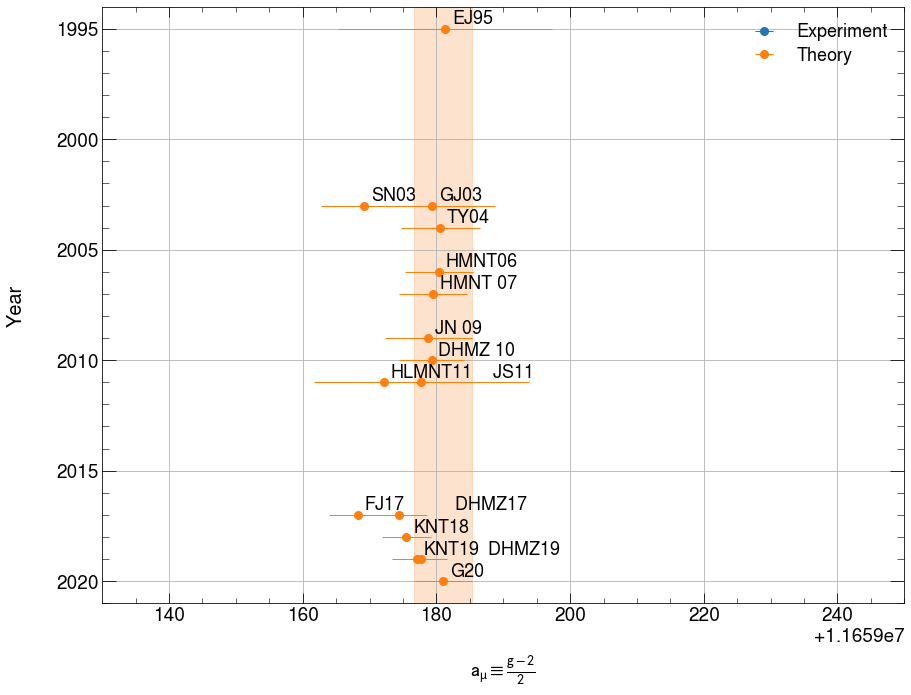

In [30]:
fig,ax = plt.subplots(figsize=(13,10))


# experiment 
startingpos = len(experiment)-1
endingpos = len(experiment)
nameloc = float(values[startingpos:startingpos+1][0])

xlimits = [1.165875e7+380,1.16596e7-350] # final
# xlimits = [-1e8,1e8] # dirac + schwinger
# xlimits = [.116e8,.1166e8] # dirac + schwinger
ylimits = [2021,1994]

xoffset = 1

plt.errorbar(values[startingpos:endingpos], years[startingpos:endingpos], xerr=errors[startingpos:endingpos], fmt="o", label="Experiment")
for year, name, value, error, *_ in experiment[startingpos:endingpos]:
    if( value+xoffset > xlimits[0] and value+xoffset < xlimits[1] and year-.225 > ylimits[1] and year-.225 < ylimits[0]):
        plt.text(value+xoffset, year-.225, name)
    
#theory
tstartingpos = 0
tendingpos = 100
plt.errorbar(tvalues[tstartingpos:tendingpos], tyears[tstartingpos:tendingpos], xerr=terrors[tstartingpos:tendingpos], fmt="o", label='Theory')
for year, name, value, error, *_ in theory[tstartingpos:tendingpos]:
    if( value+xoffset > xlimits[0] and value+xoffset < xlimits[1] and year-.225 > ylimits[1] and year-.225 < ylimits[0]):
        plt.text(value+xoffset, year-.225, name)
    
plt.legend()
    
plt.gca().invert_yaxis()
plt.grid()

plt.tight_layout()

plt.ylabel("Year")
plt.xlabel(r"$a_\mu \equiv \frac{g-2}{2}$")

plt.ylim(ylimits[0], ylimits[1])
plt.xlim(xlimits[0], xlimits[1])


# e821_index = len(experiment)-2
# rect = matplotlib.patches.Rectangle( [experiment[e821_index][2] - experiment[e821_index][3] , 2031], 
#                                       experiment[e821_index][3]*2, -1000, color='xkcd:light blue', alpha=0.2 )
# ax.add_patch(rect)

# e989_index = len(experiment)-1
# rect2 = matplotlib.patches.Rectangle( [experiment[e989_index][2] - experiment[e989_index][3] , 2031], 
#                                       experiment[e989_index][3]*2, -1000, color='xkcd:purple', alpha=0.2 )
# ax.add_patch(rect2)

theory_index = len(theory)-1
rect2 = matplotlib.patches.Rectangle( [theory[theory_index][2] - theory[theory_index][3] , 2031], 
                                      theory[theory_index][3]*2, -1000, color='xkcd:orange', alpha=0.2 )
ax.add_patch(rect2)


plt.tight_layout()
plt.show()

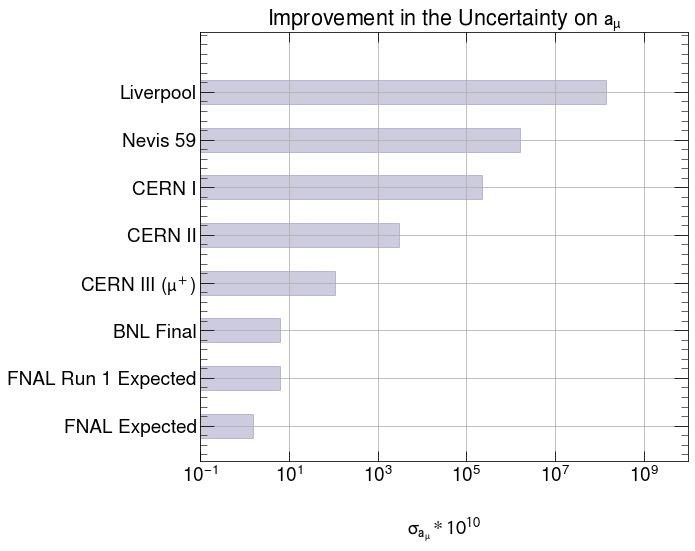

In [73]:
exp_to_plot = [1, 2, 3, 4, 5, 12, 13, 14]

rects = []
names = []
errs = []

fig,ax = plt.subplots(figsize=(10,8))
for i,exp in enumerate(exp_to_plot):
    name = experiment[exp][1]
    names.append(name)
    err = experiment[exp][3]
    errs.append(err)
#     print(name,exp,err)
    recti = matplotlib.patches.Rectangle( [0, i+1], 
                                          err, 0.5, color='xkcd:dark blue', alpha=0.2 )
    rects.append( recti )
    
for rec in rects:
    ax.add_patch(rec)
#     print(rec)
    
plt.yticks([i+1.25 for i in range(len(exp_to_plot))], labels=names, rotation=0)
    
plt.ylim(9,0)
plt.xlim(10**(-1),10**10)
plt.xscale("log")

plt.xlabel(r"$\sigma_{a_{\mu}} * 10^{10}$")
plt.title(r"Improvement in the Uncertainty on $a_{\mu}$")

plt.tight_layout()
    
plt.grid()
plt.show()

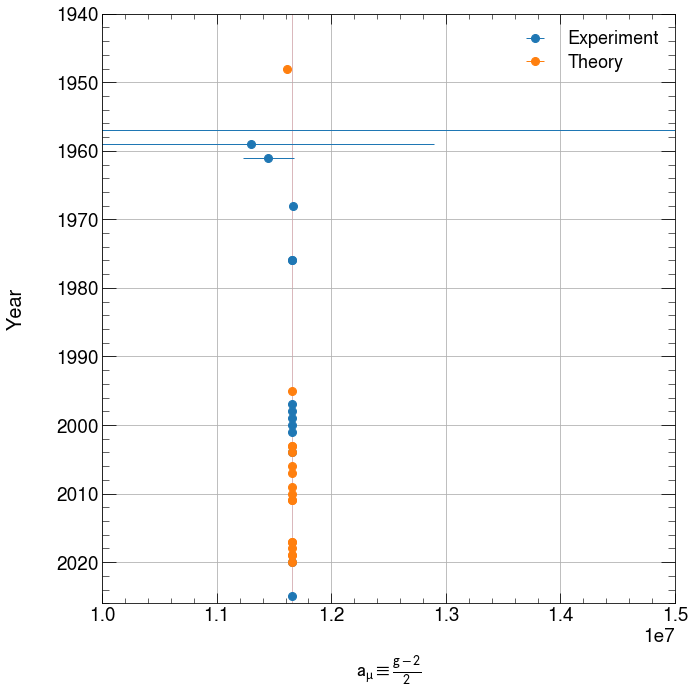

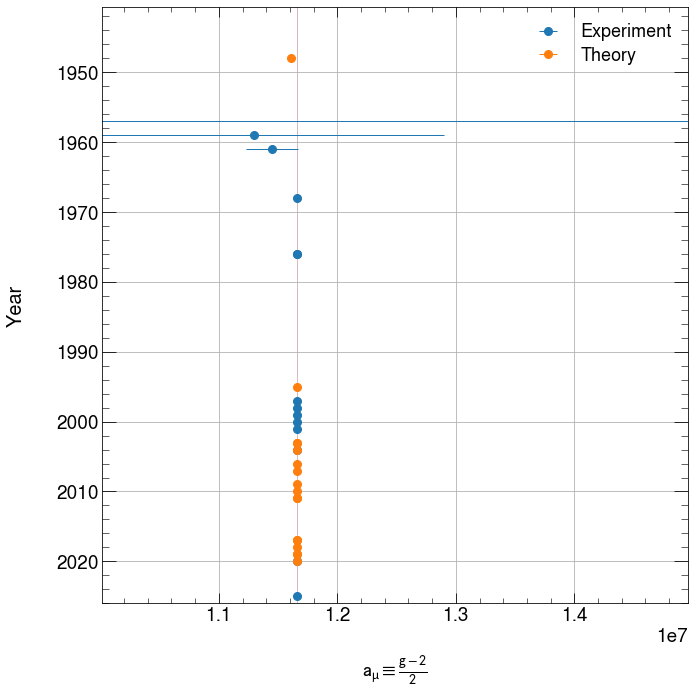

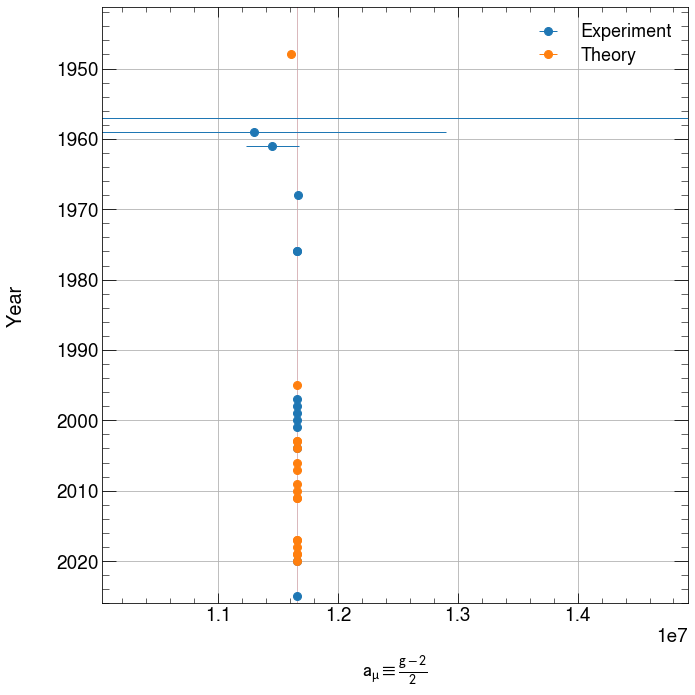

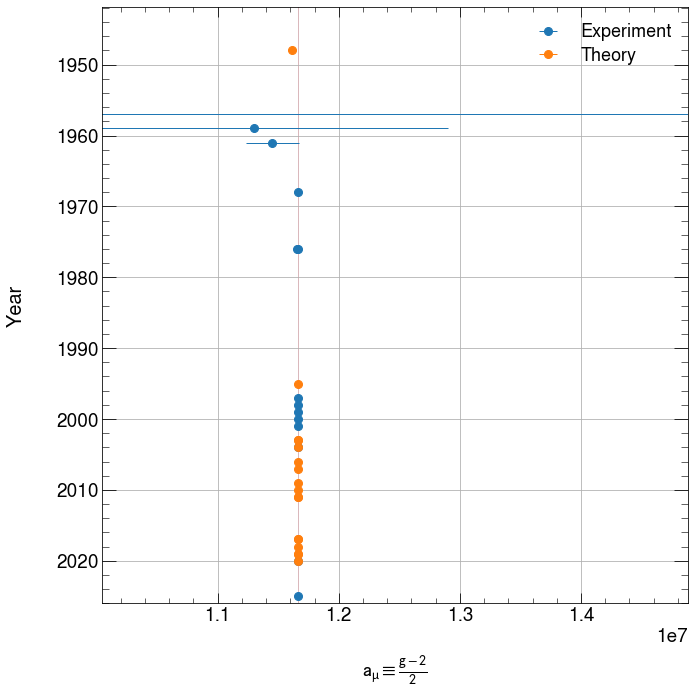

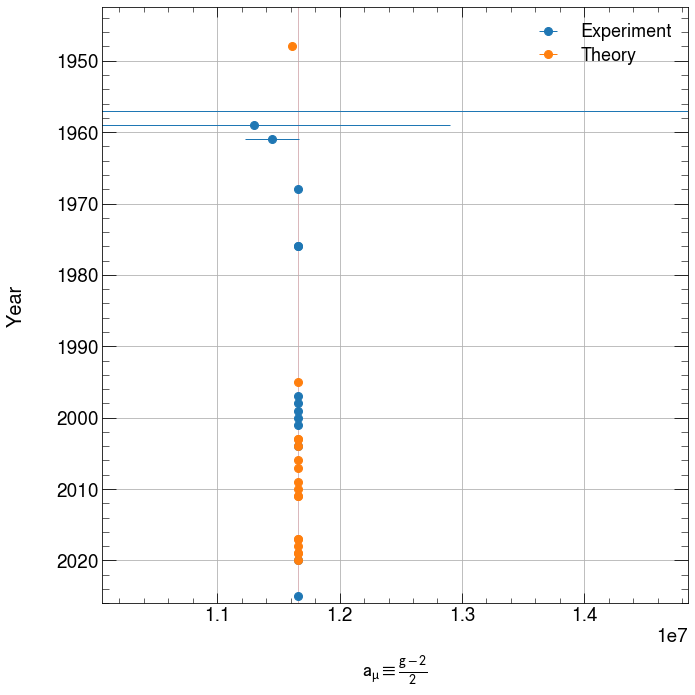

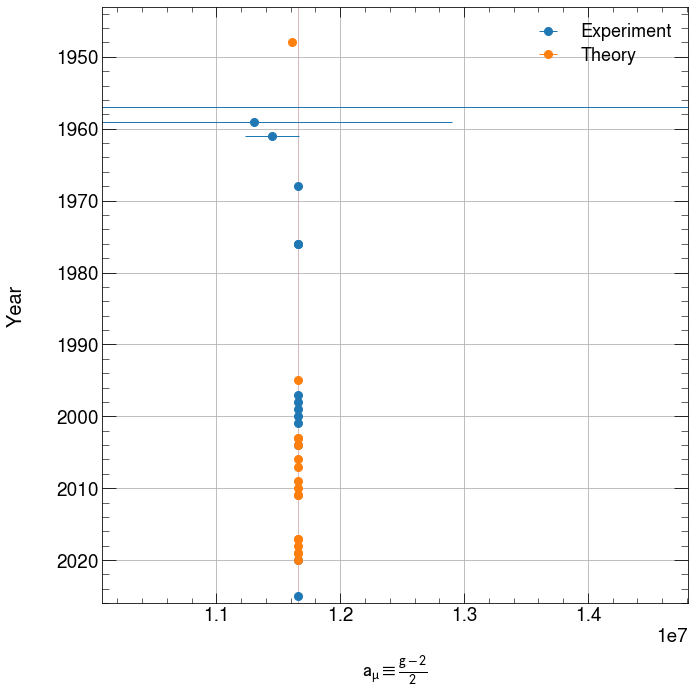

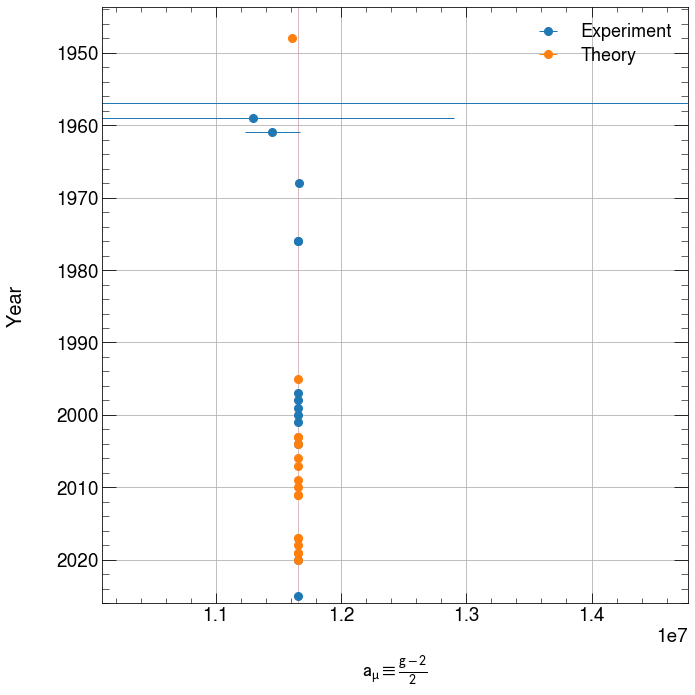

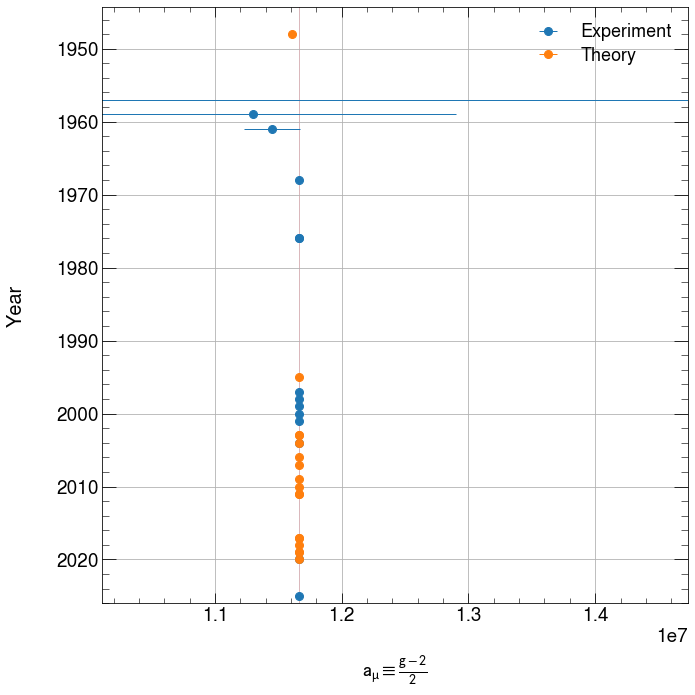

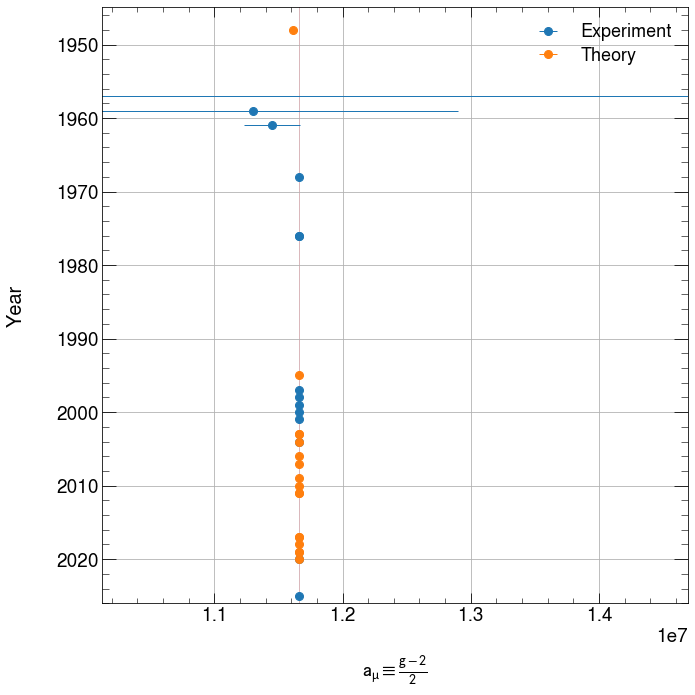

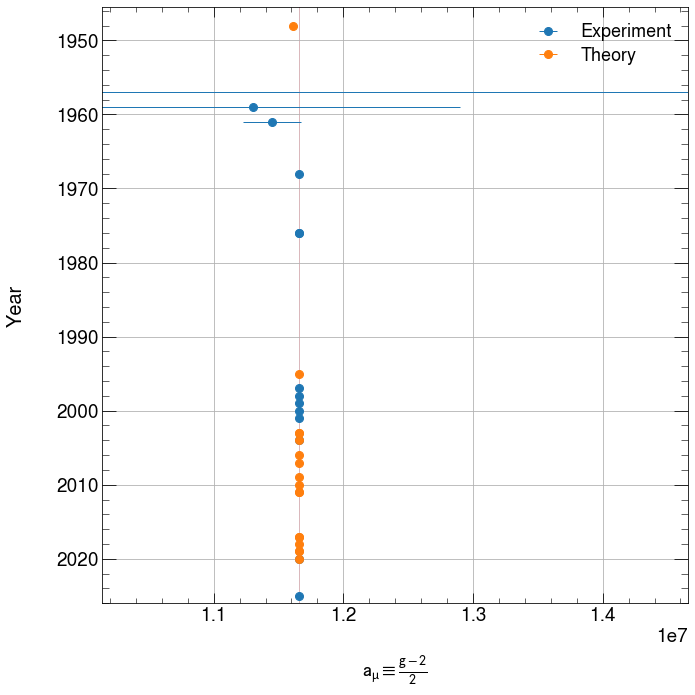

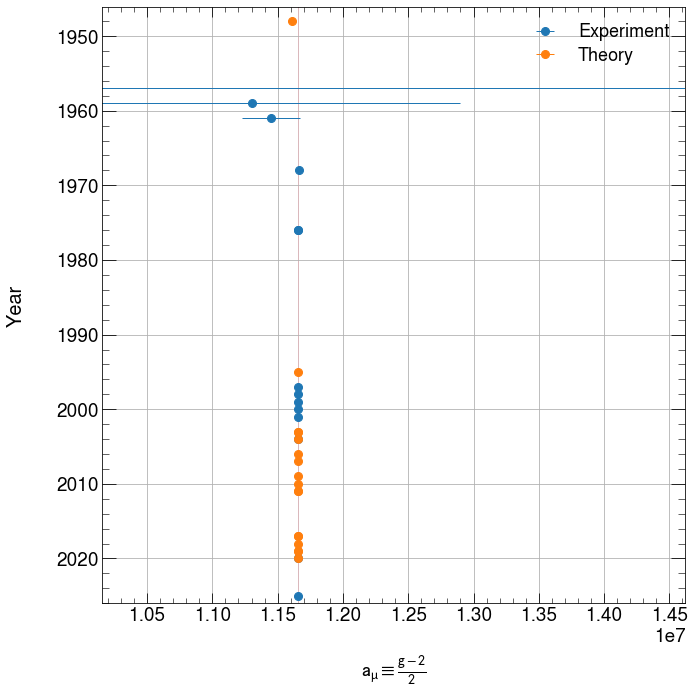

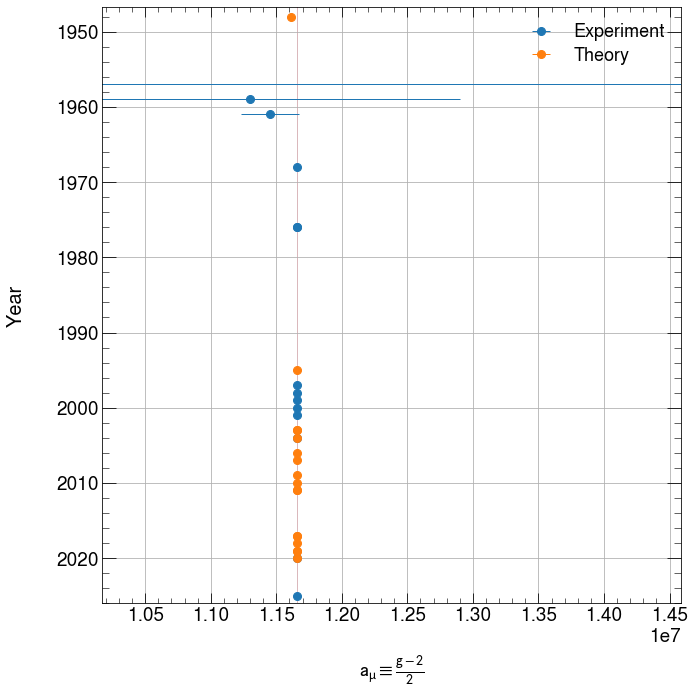

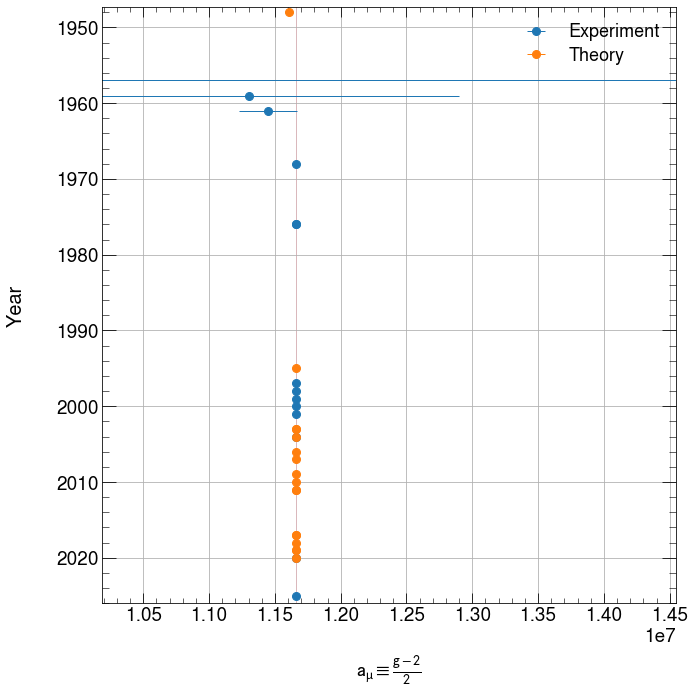

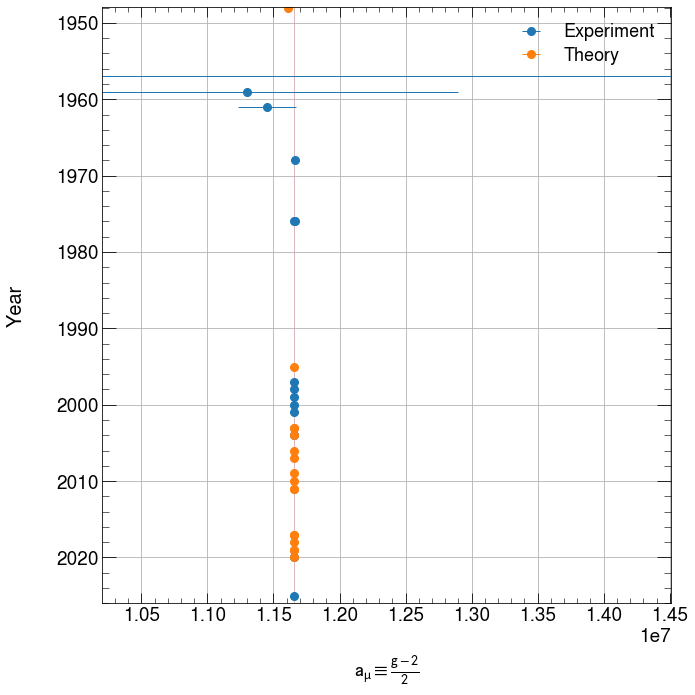

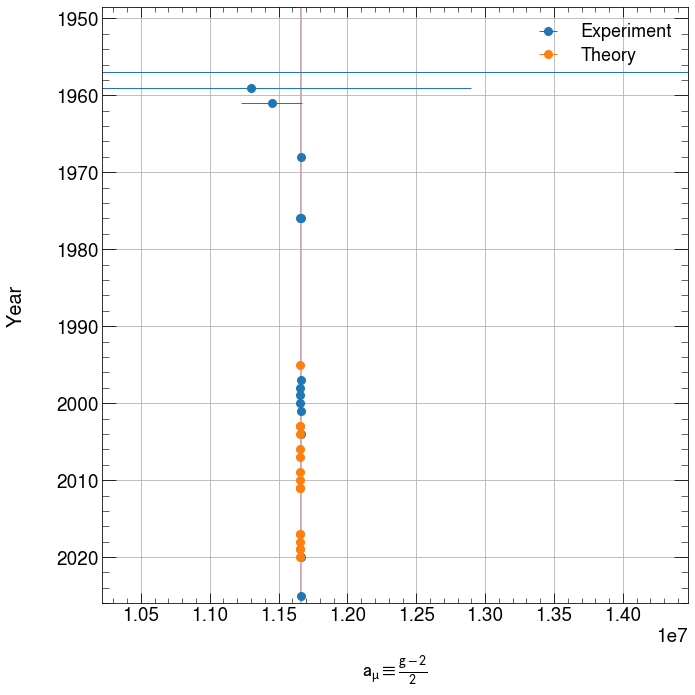

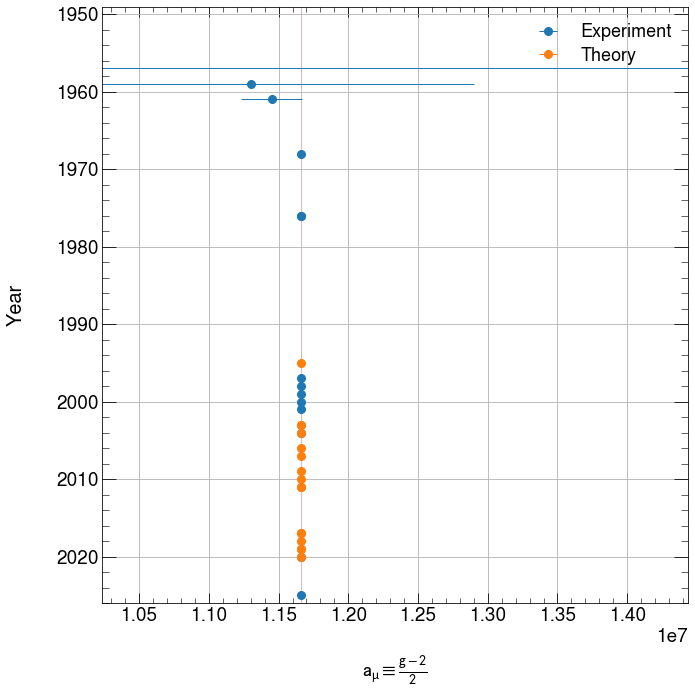

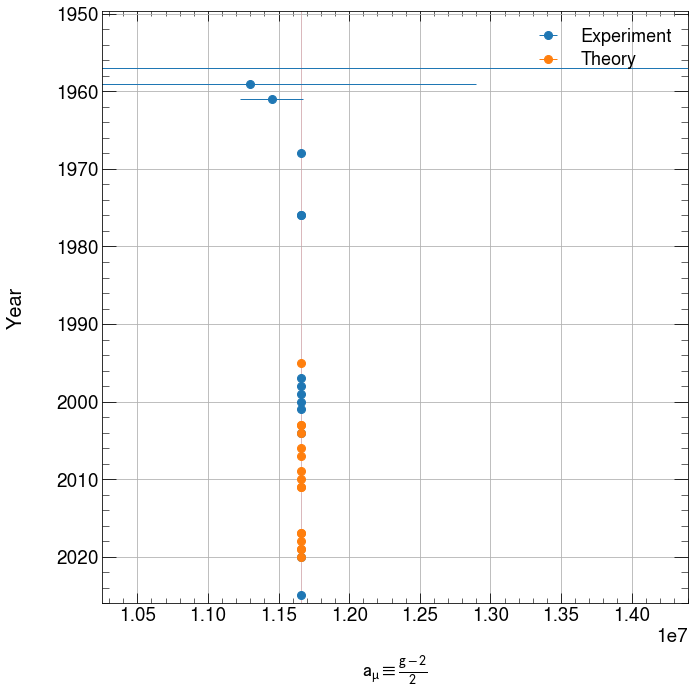

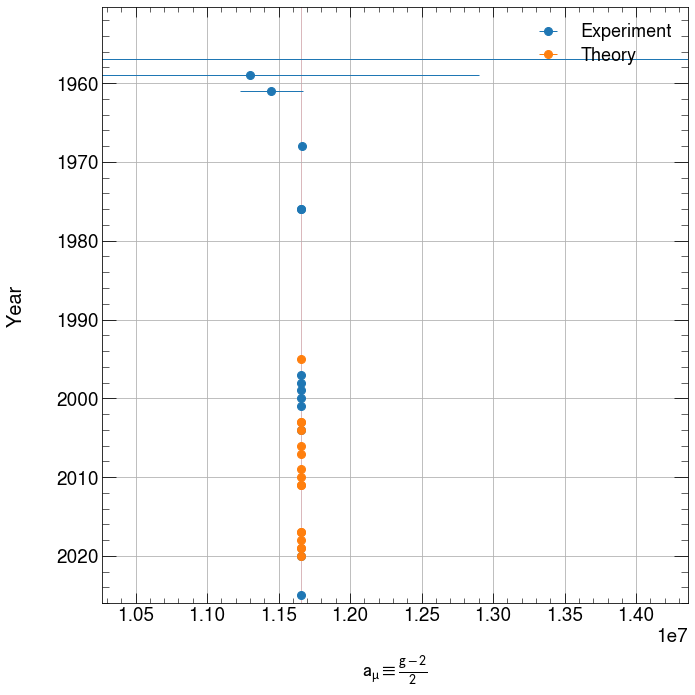

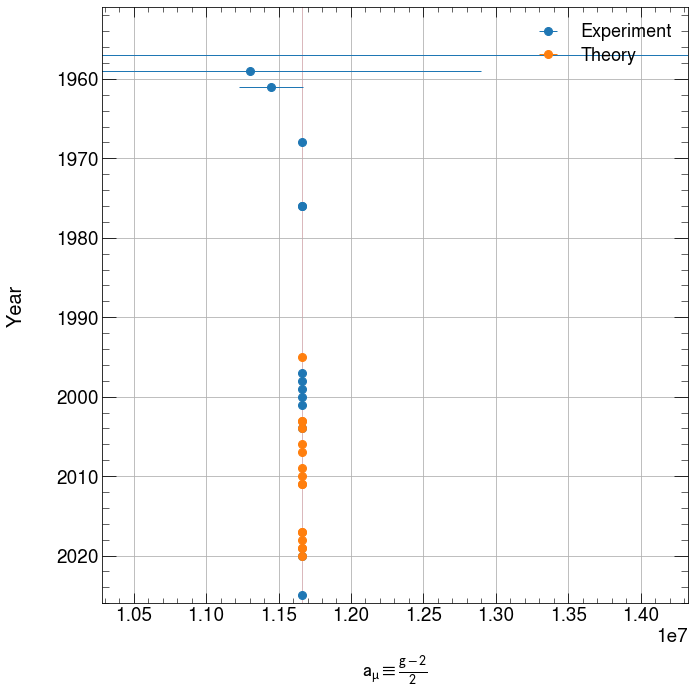

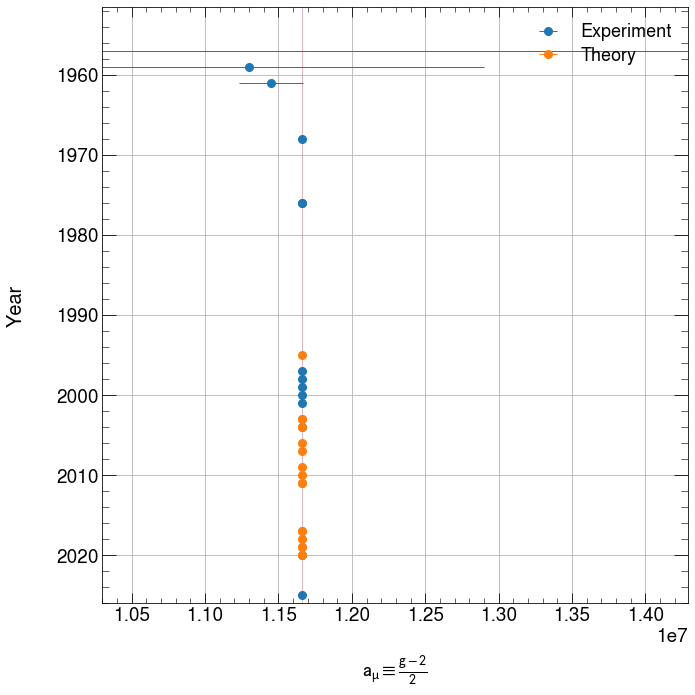

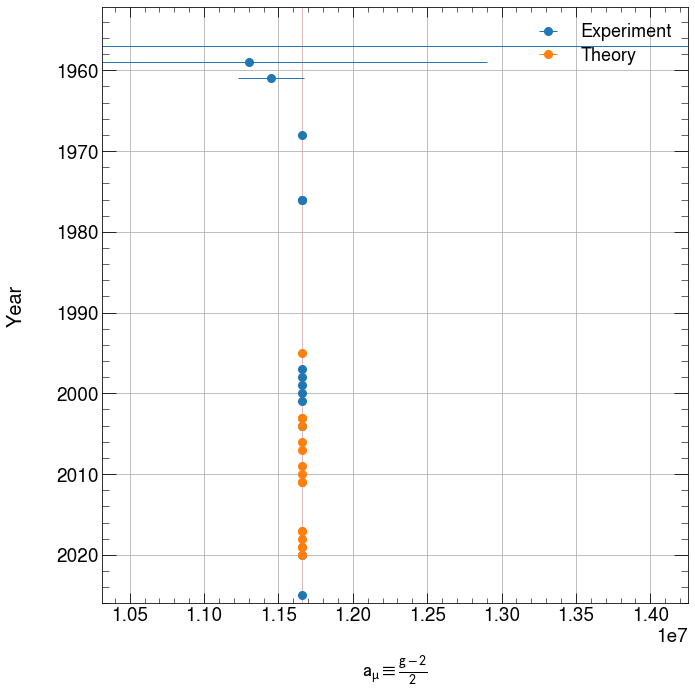

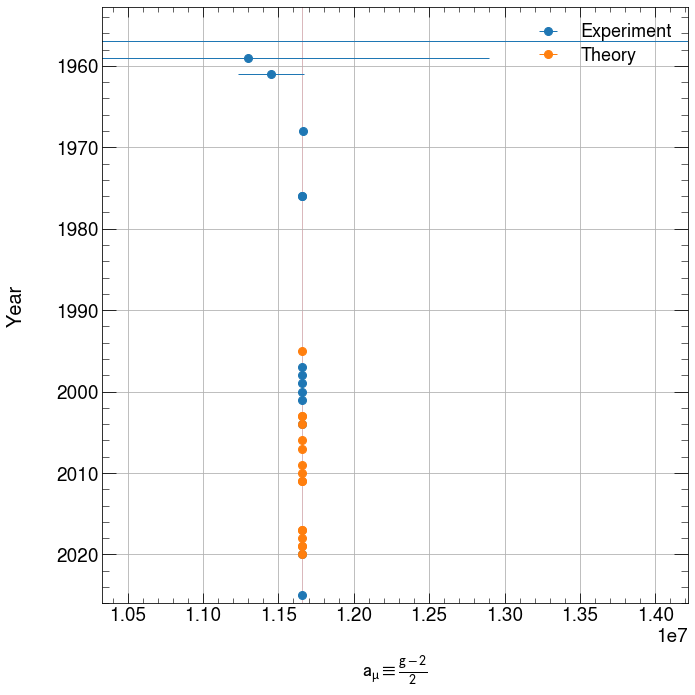

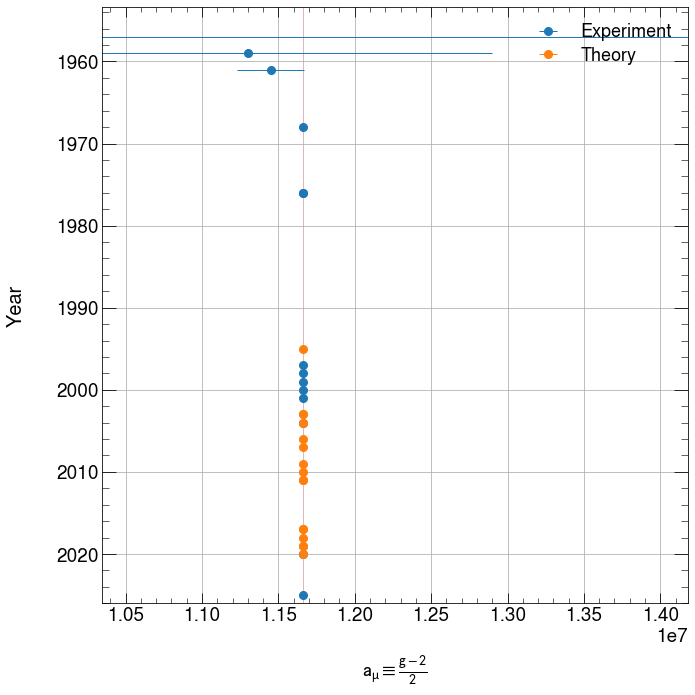

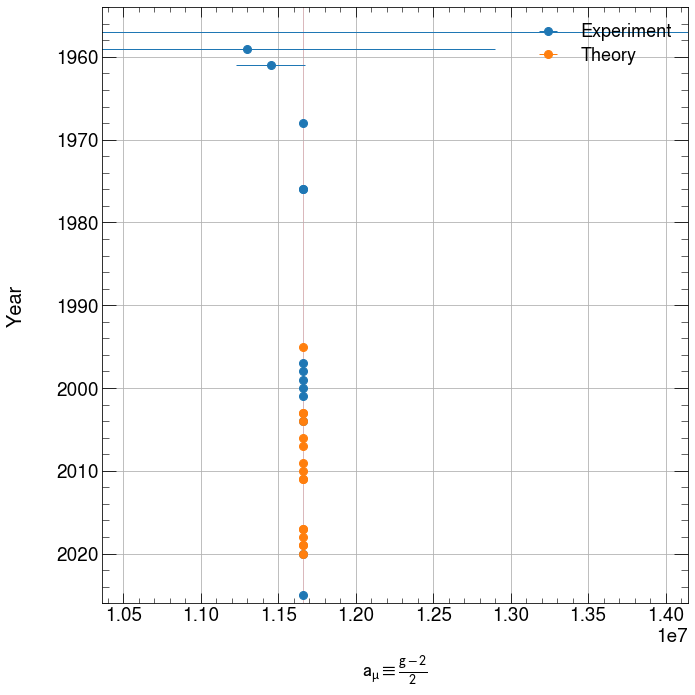

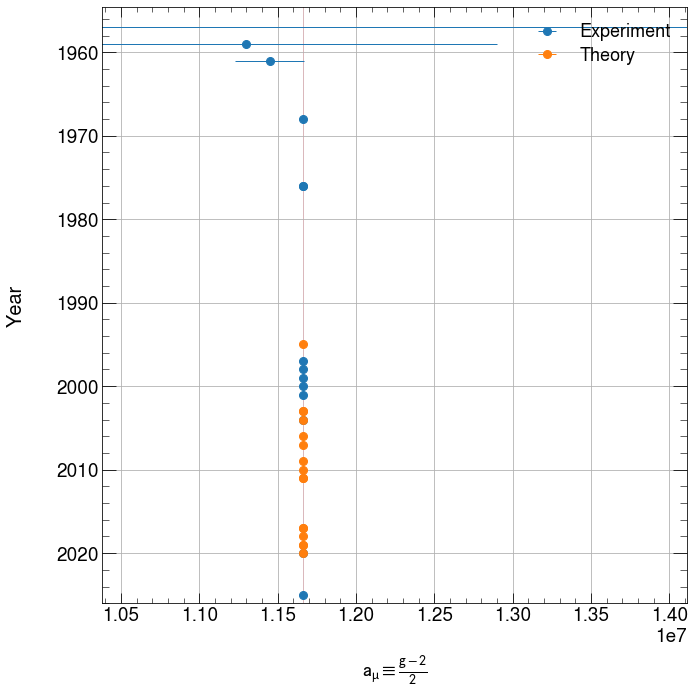

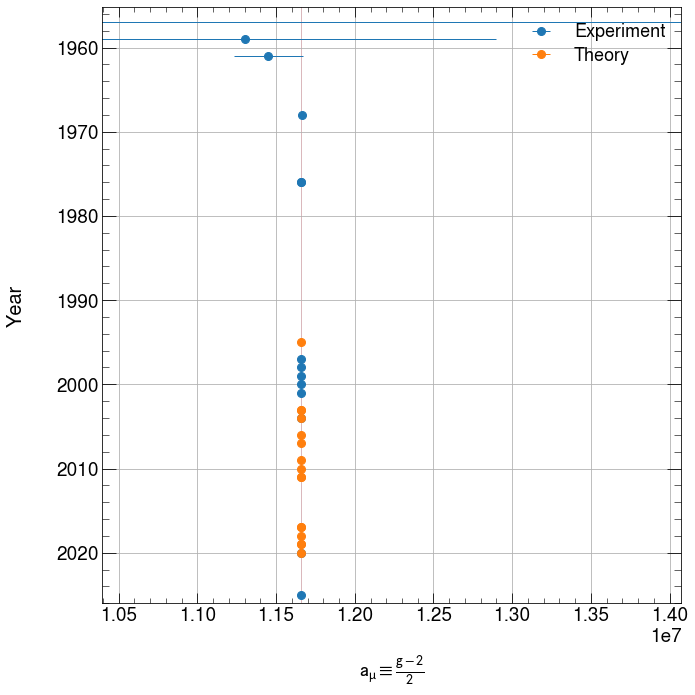

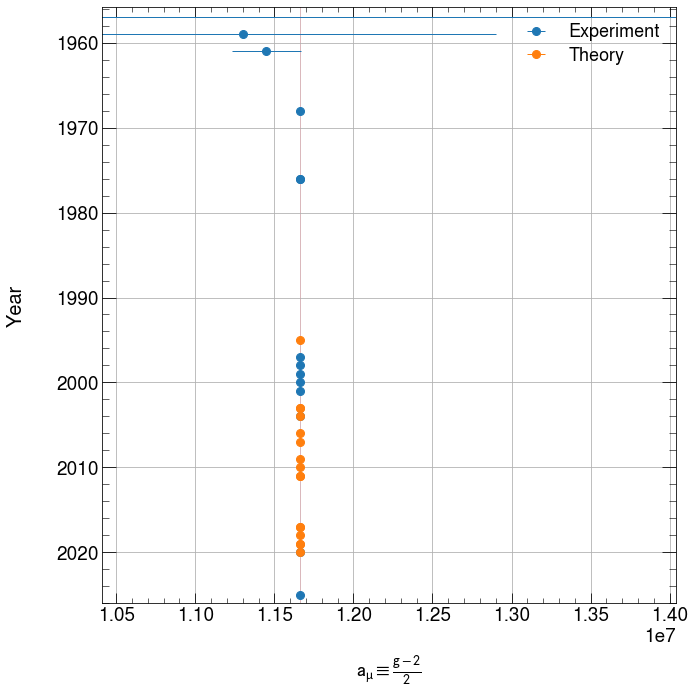

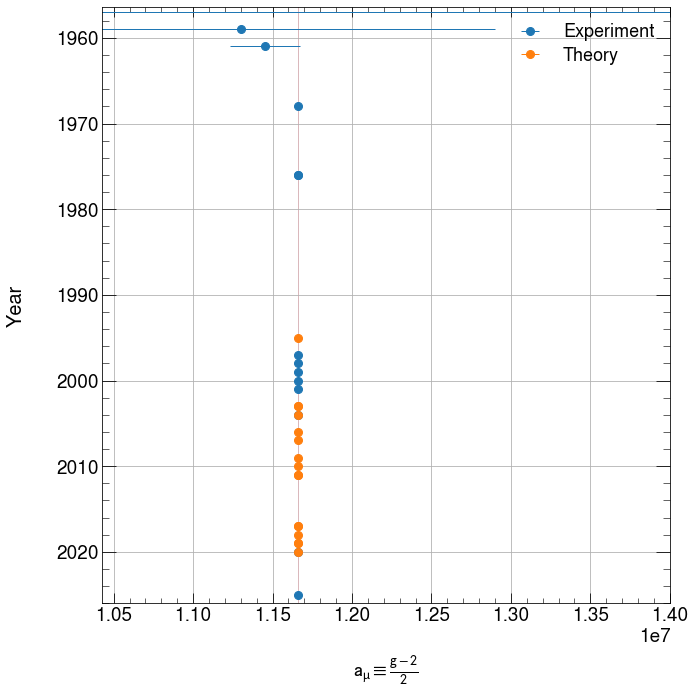

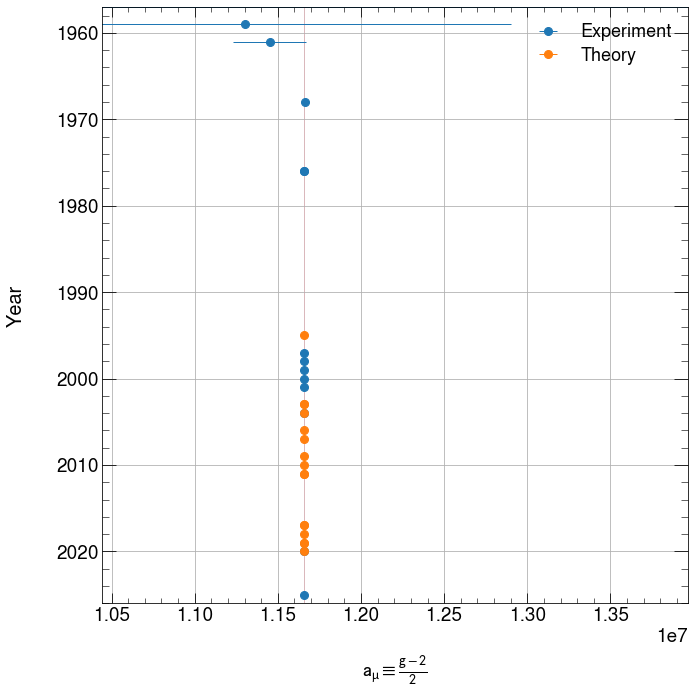

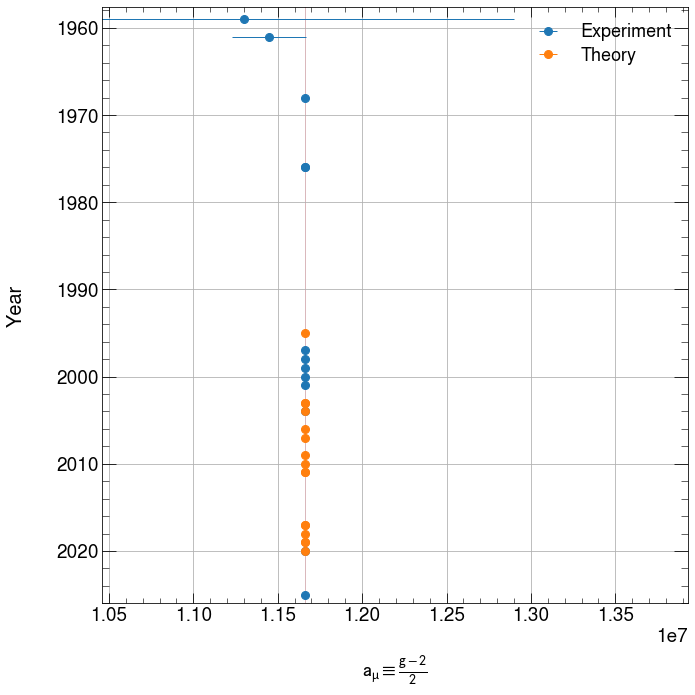

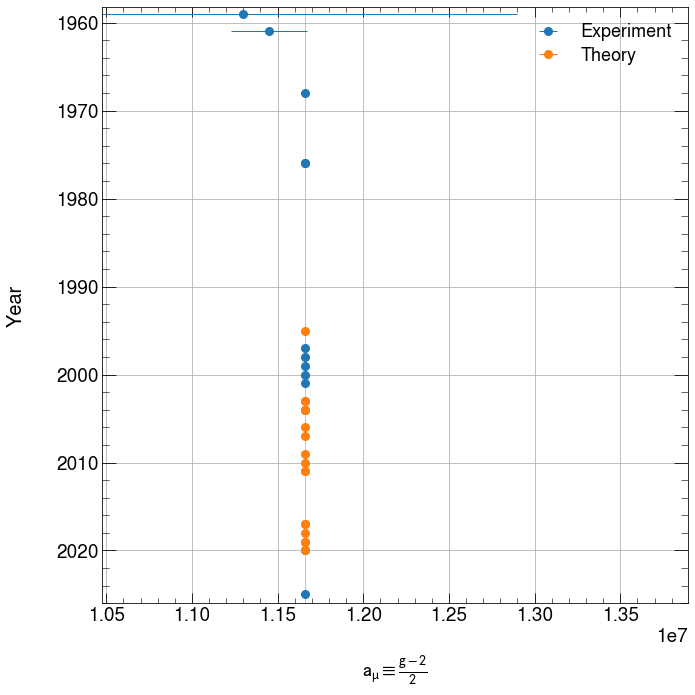

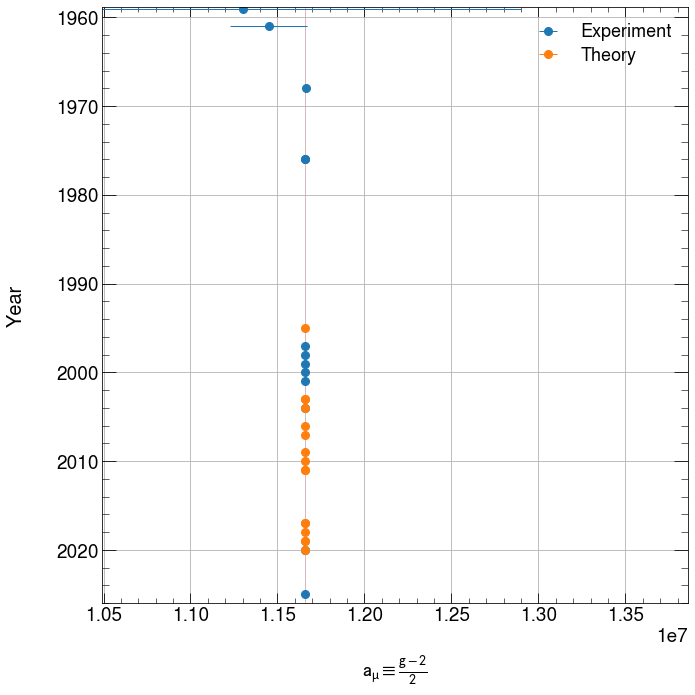

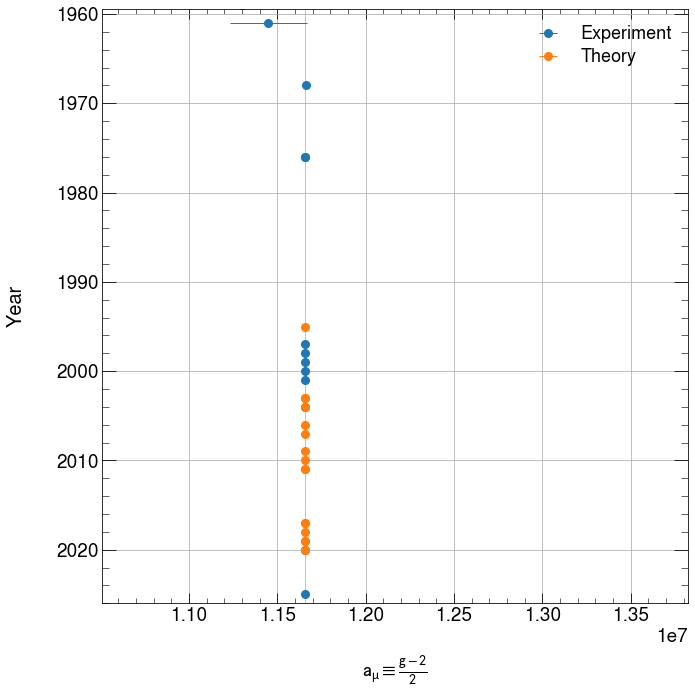

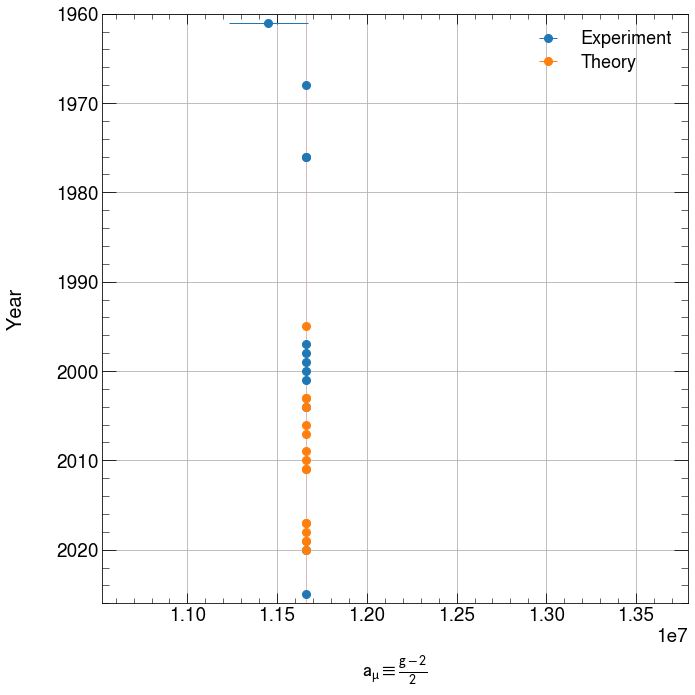

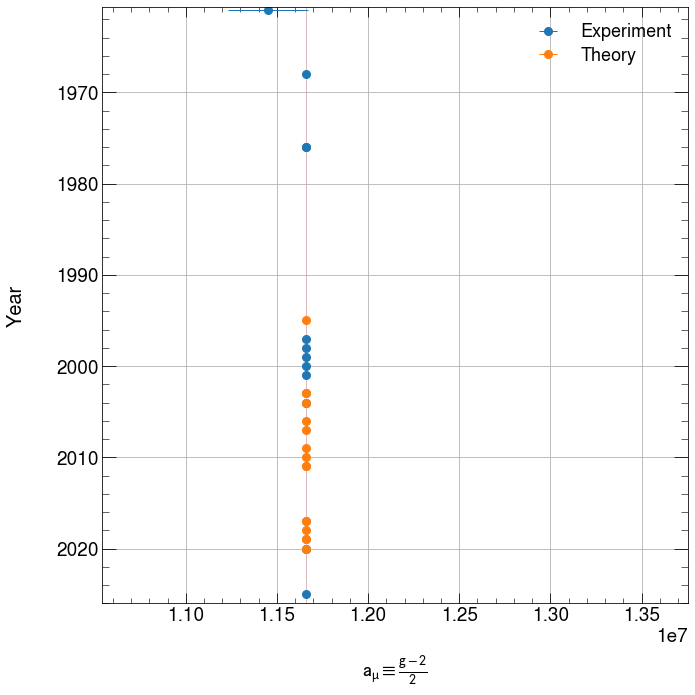

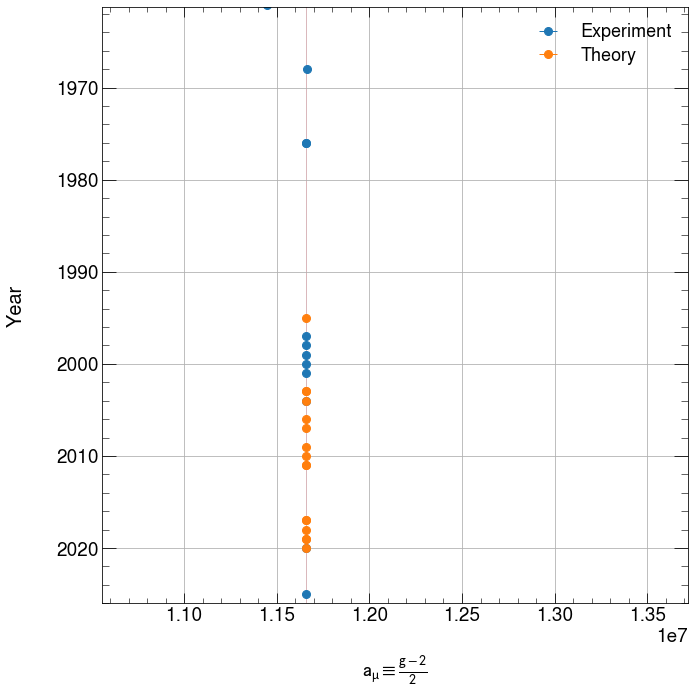

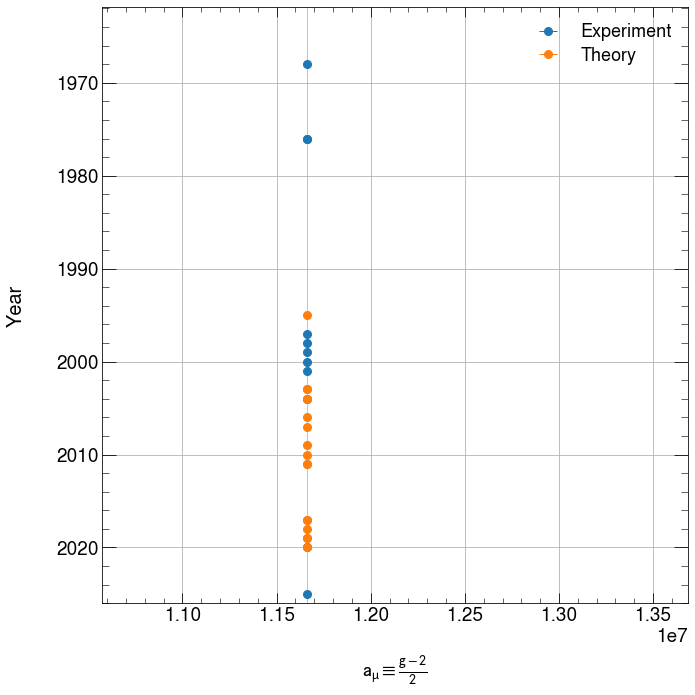

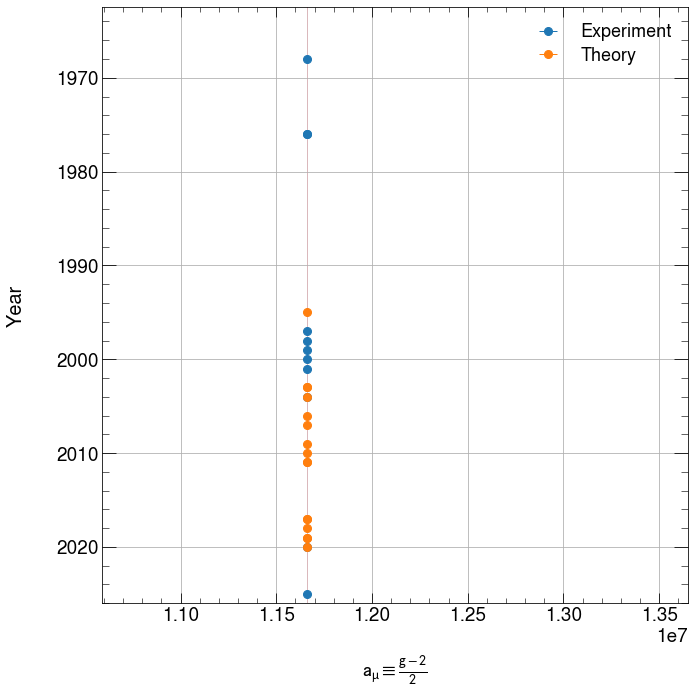

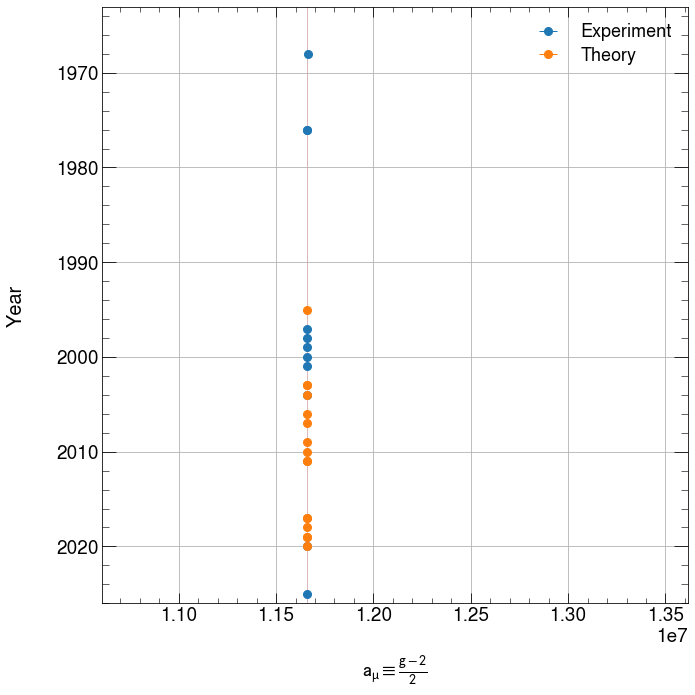

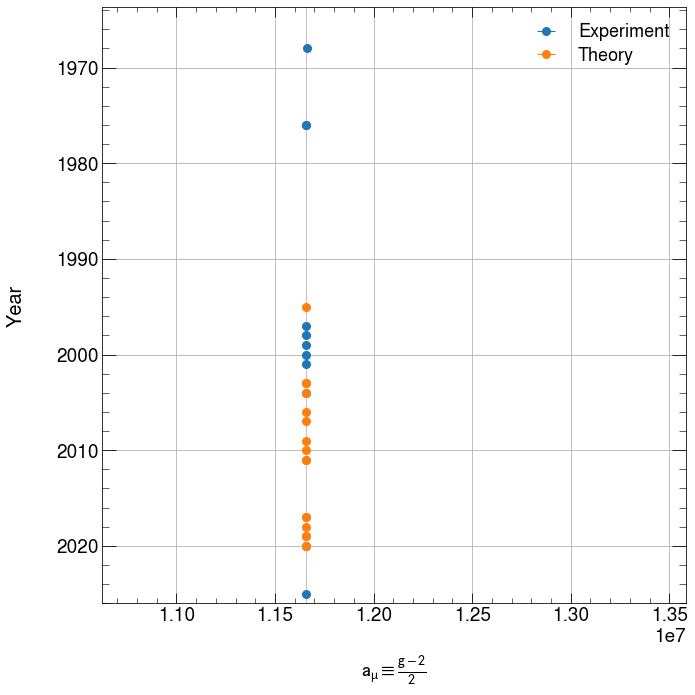

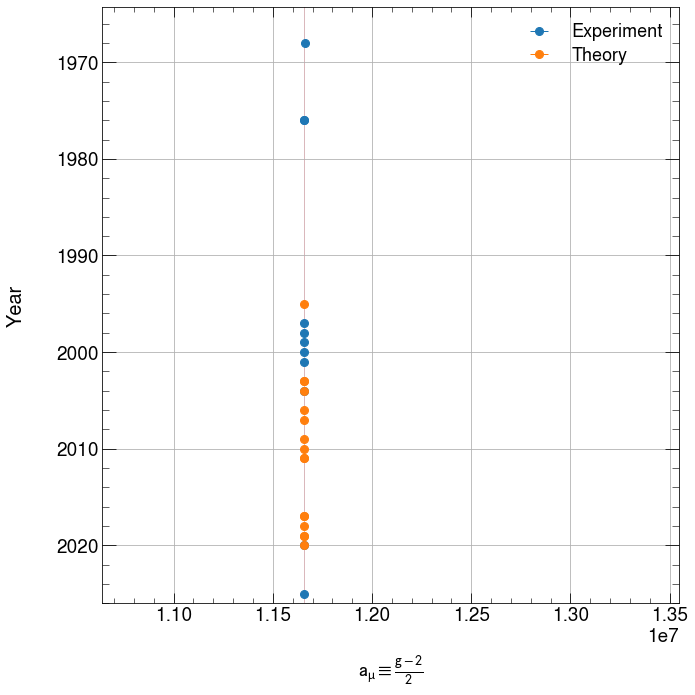

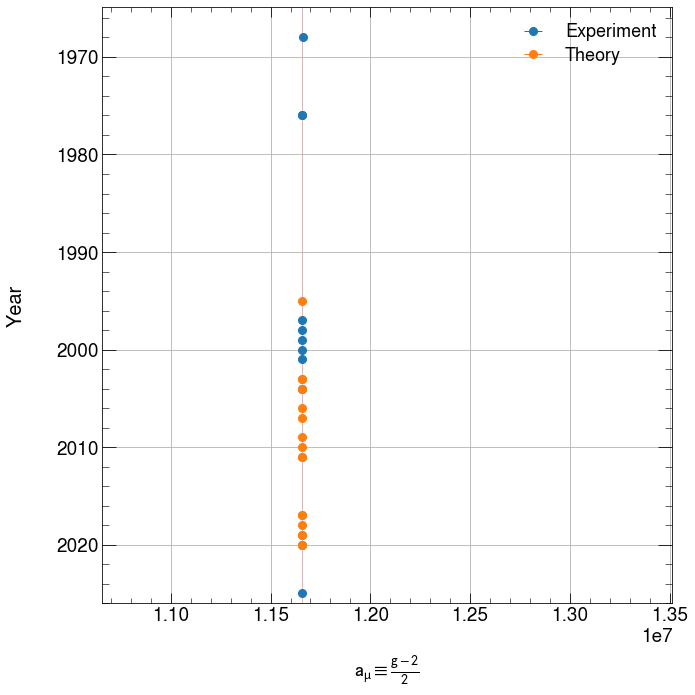

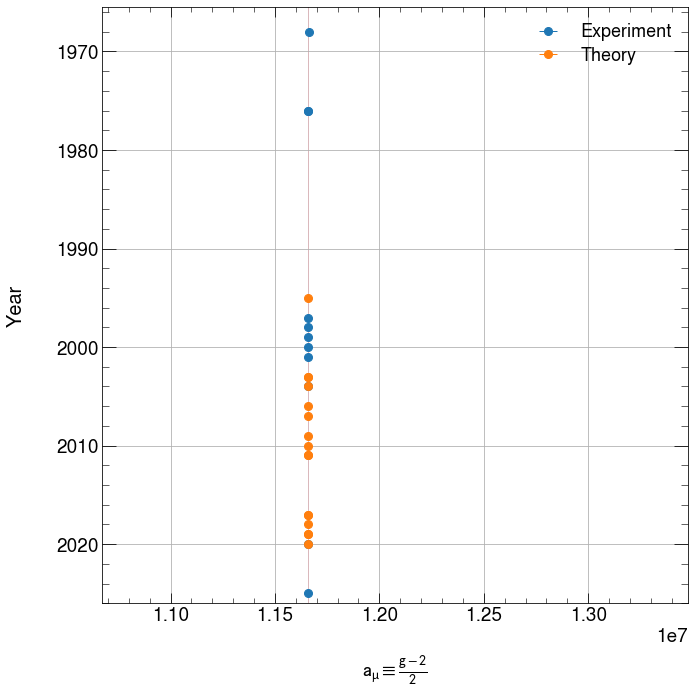

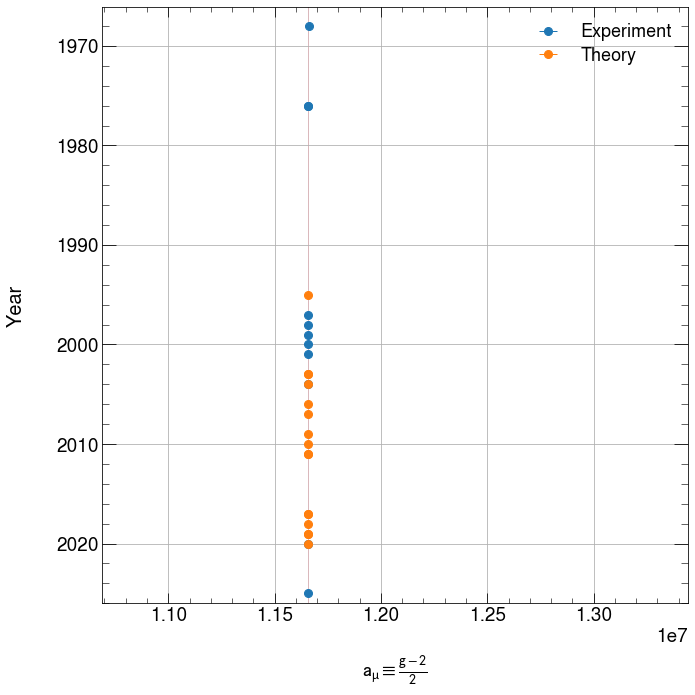

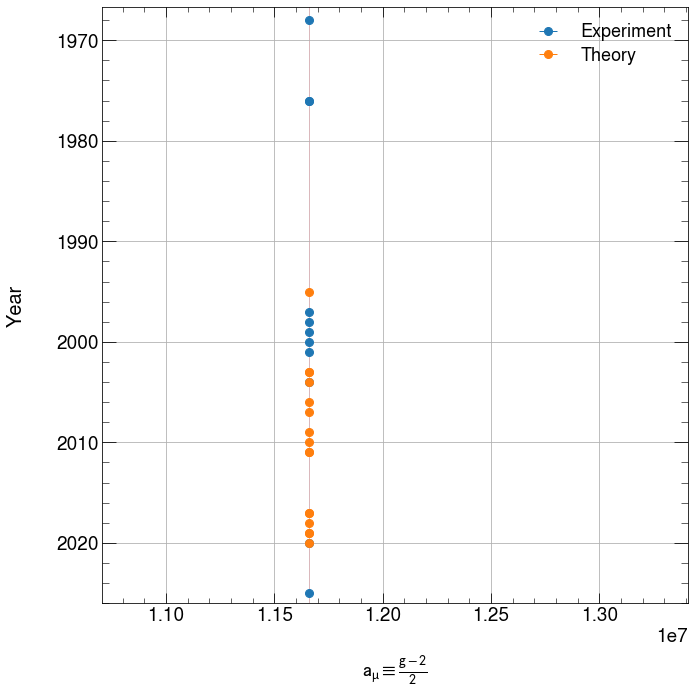

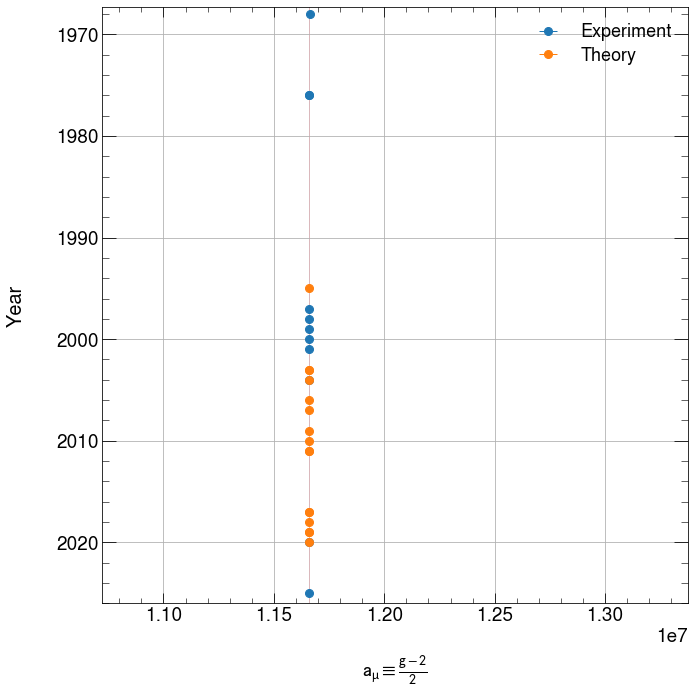

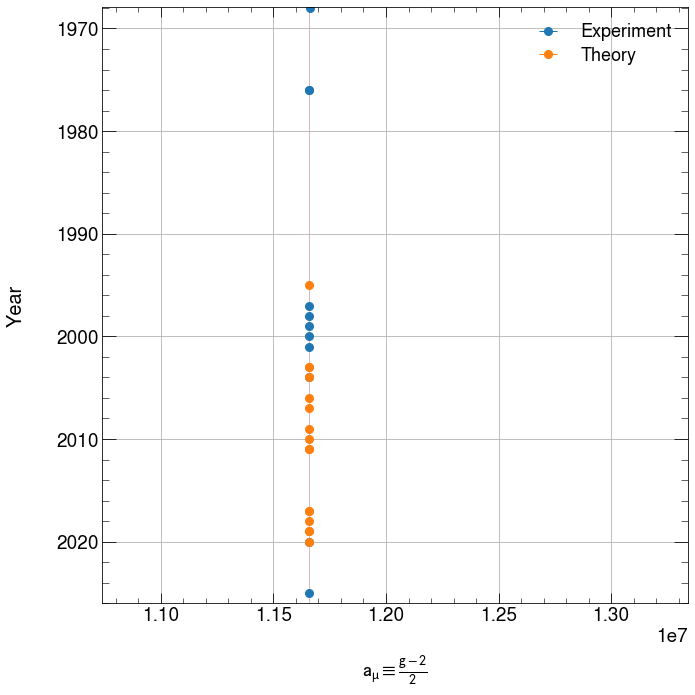

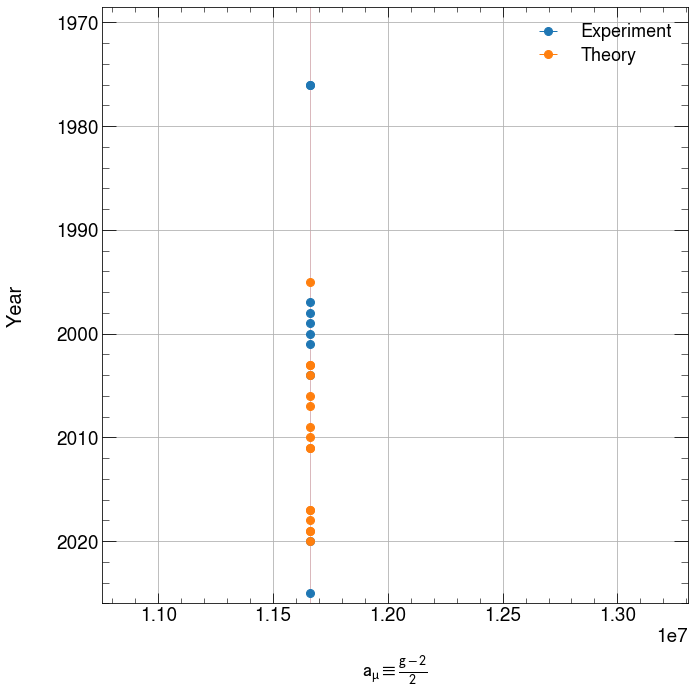

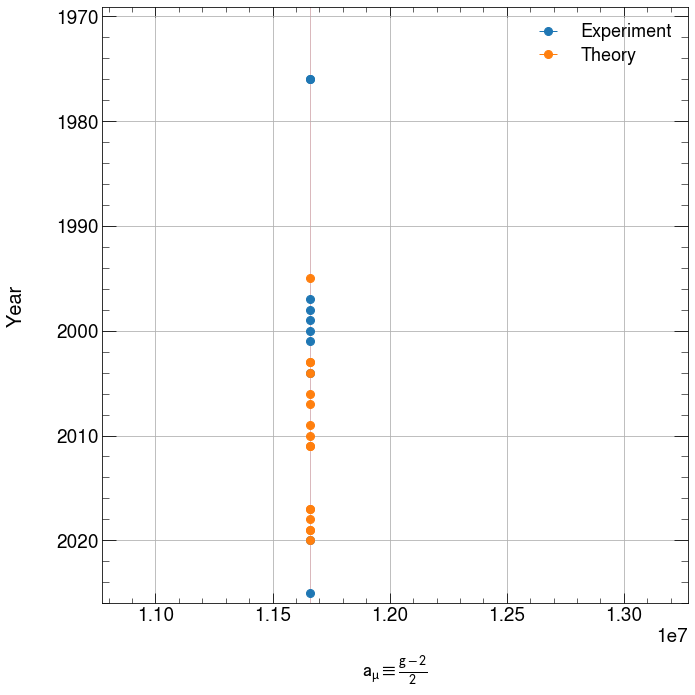

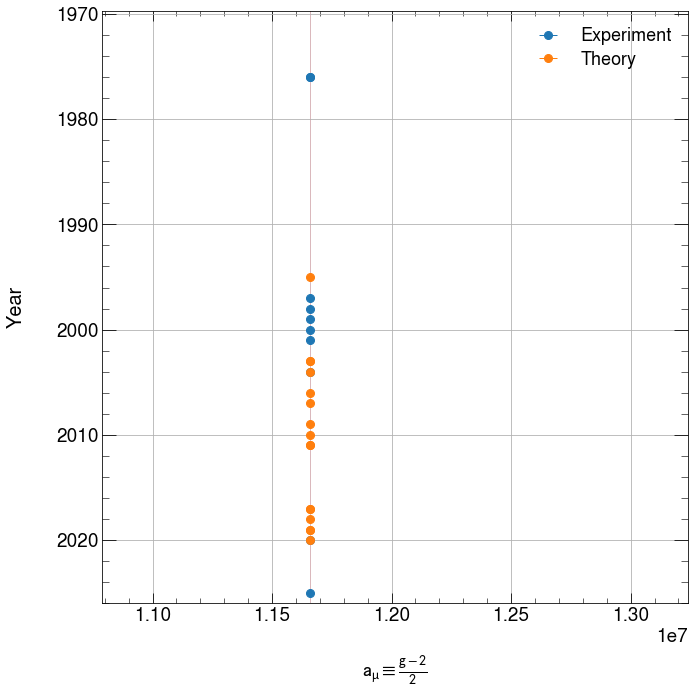

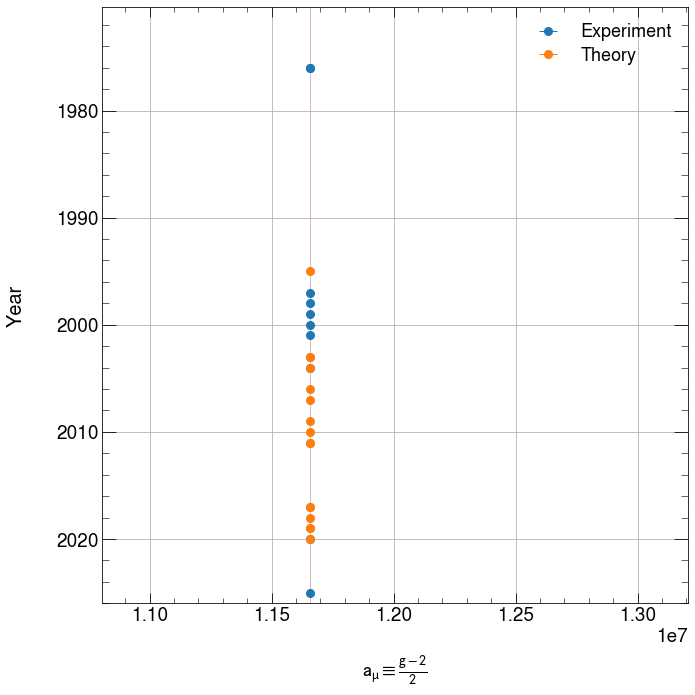

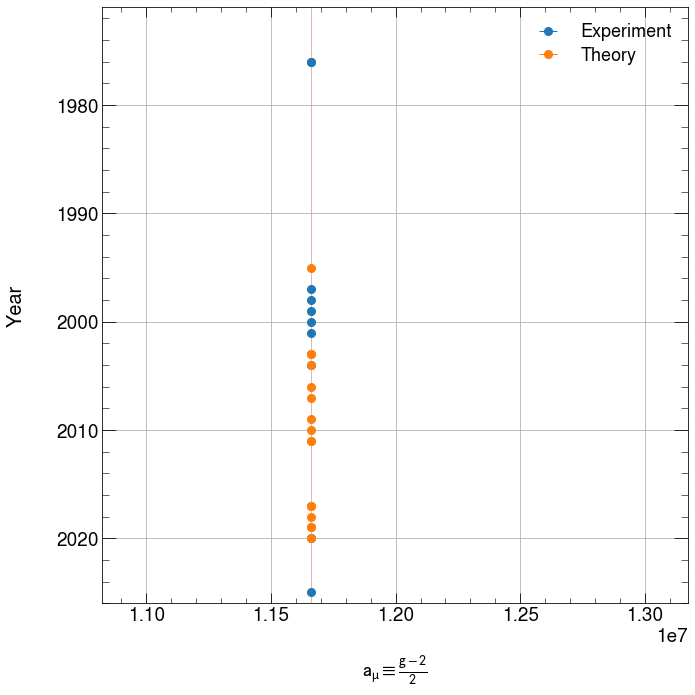

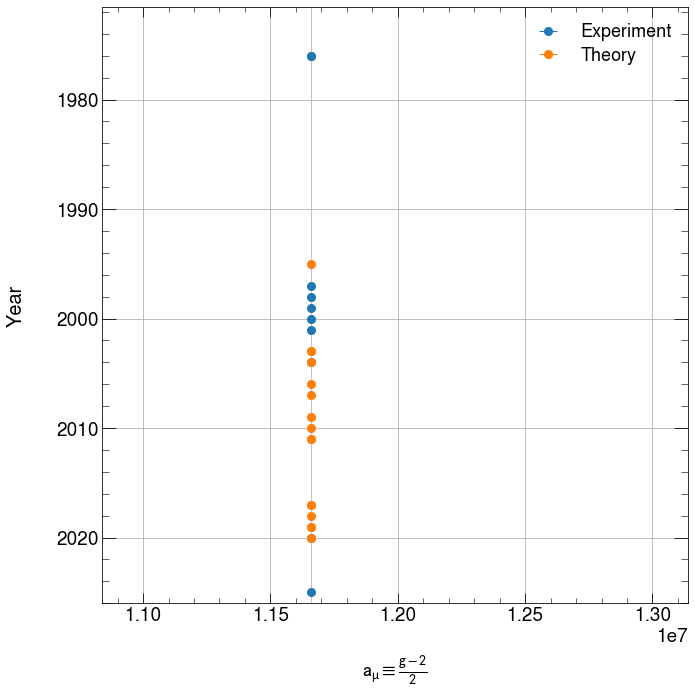

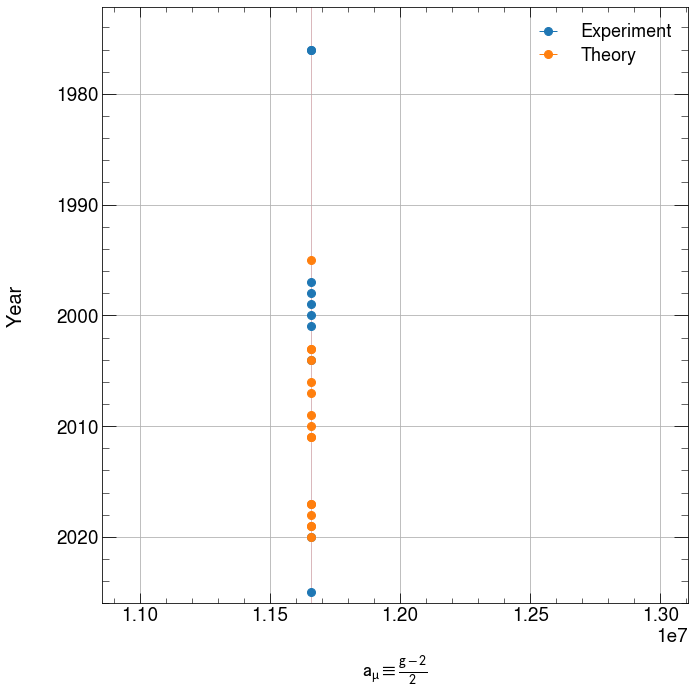

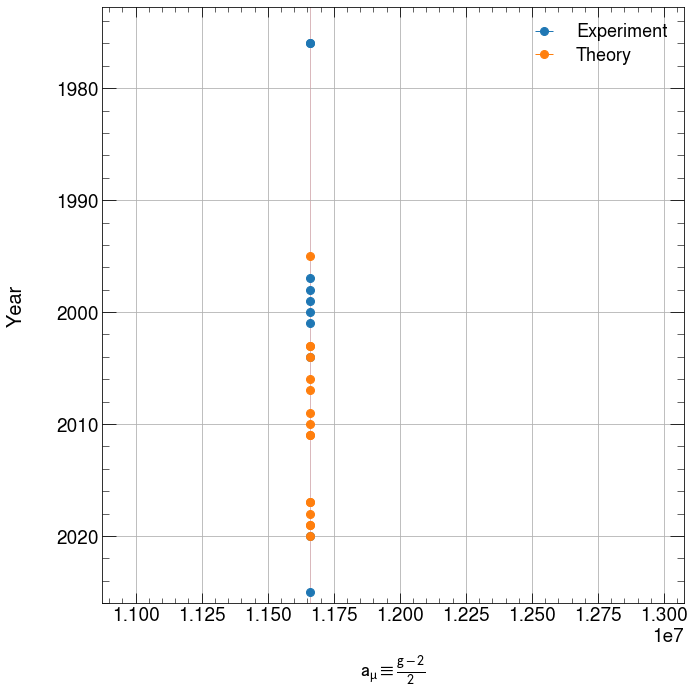

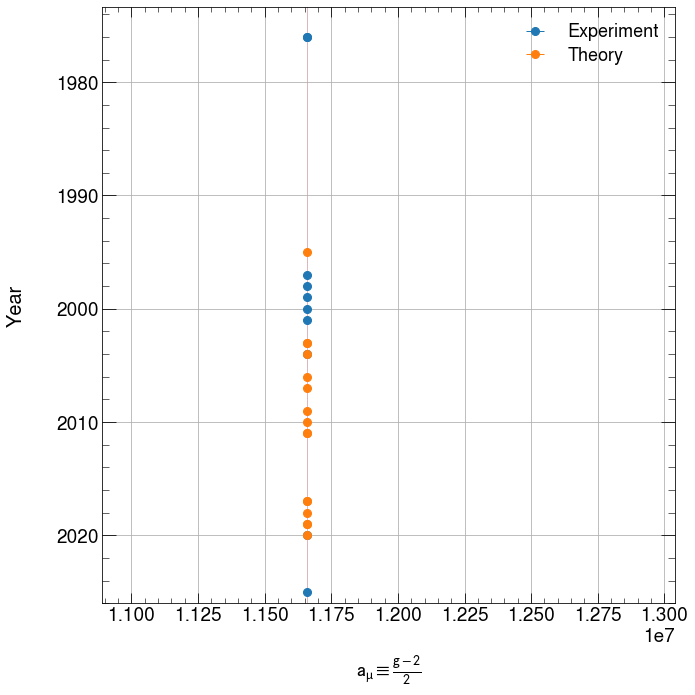

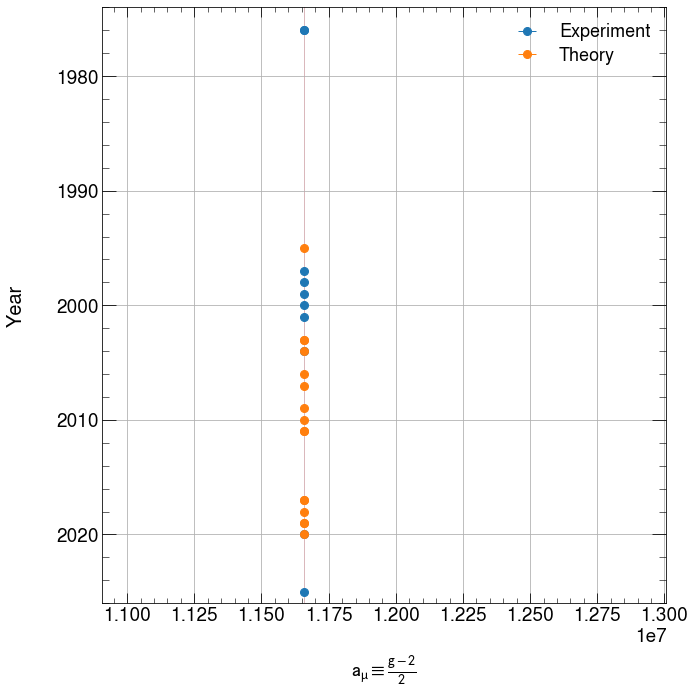

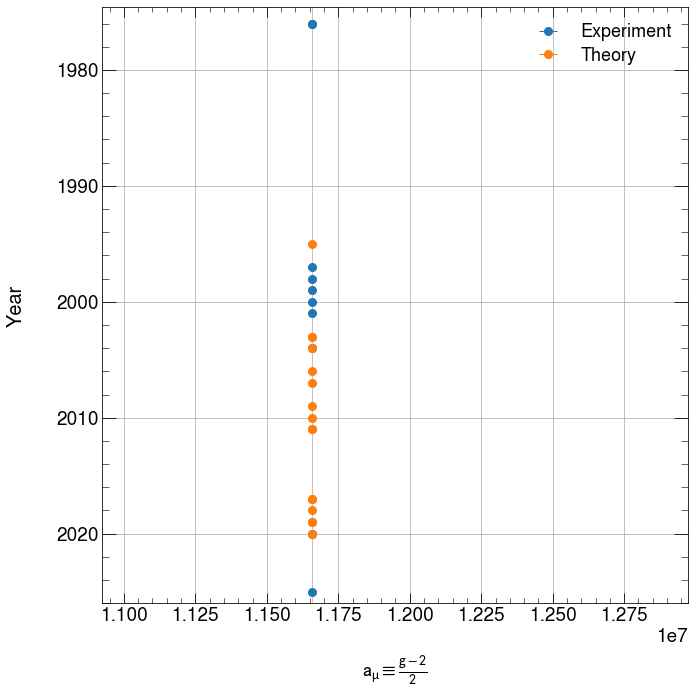

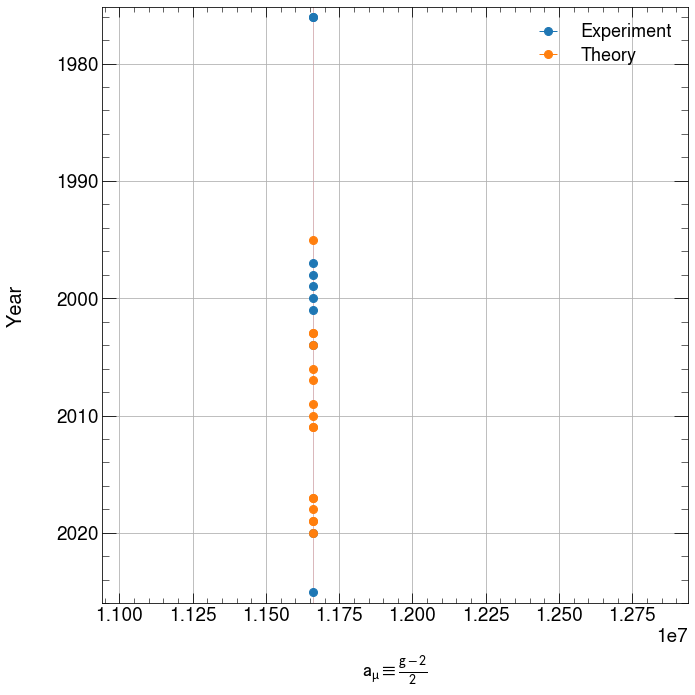

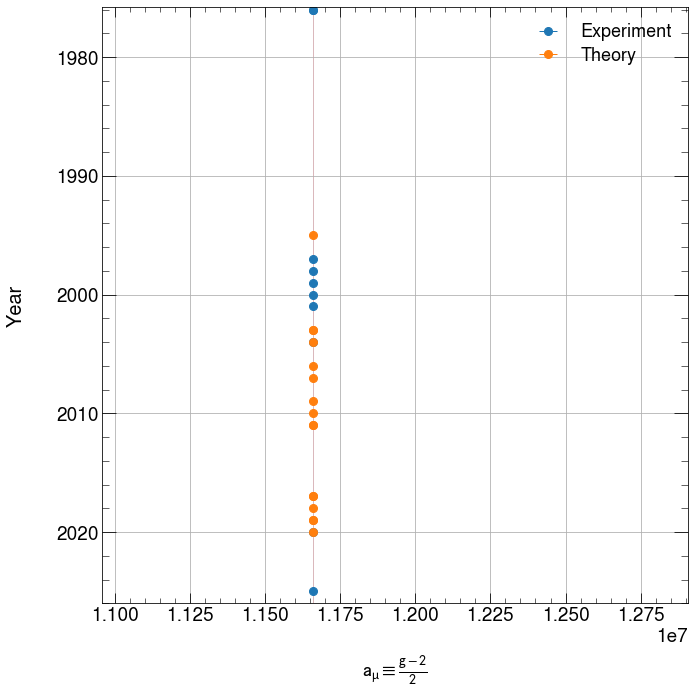

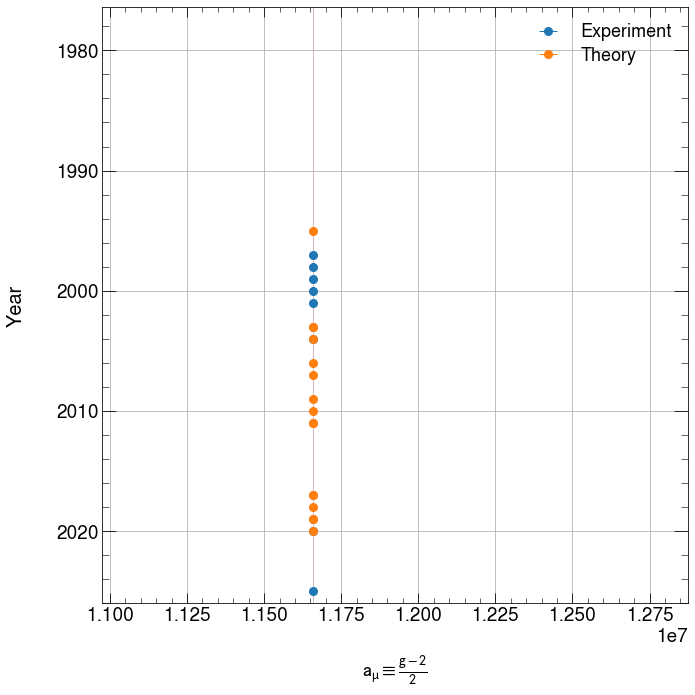

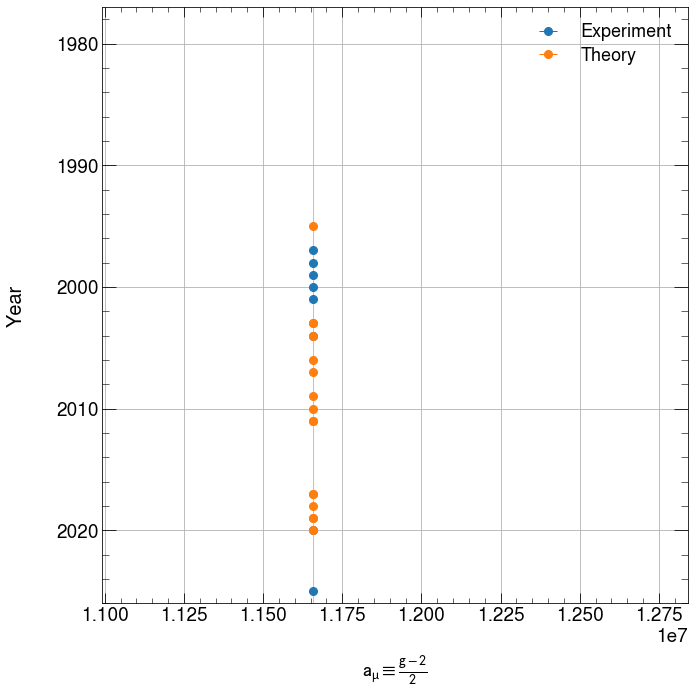

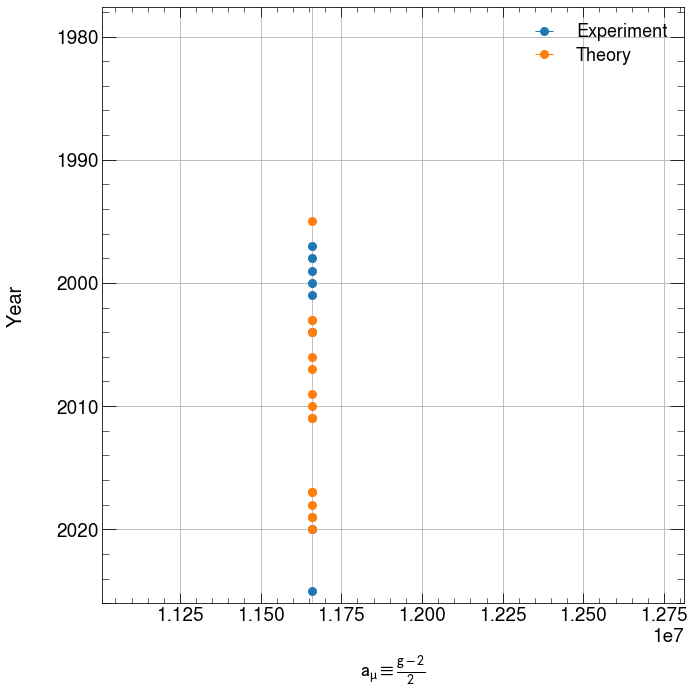

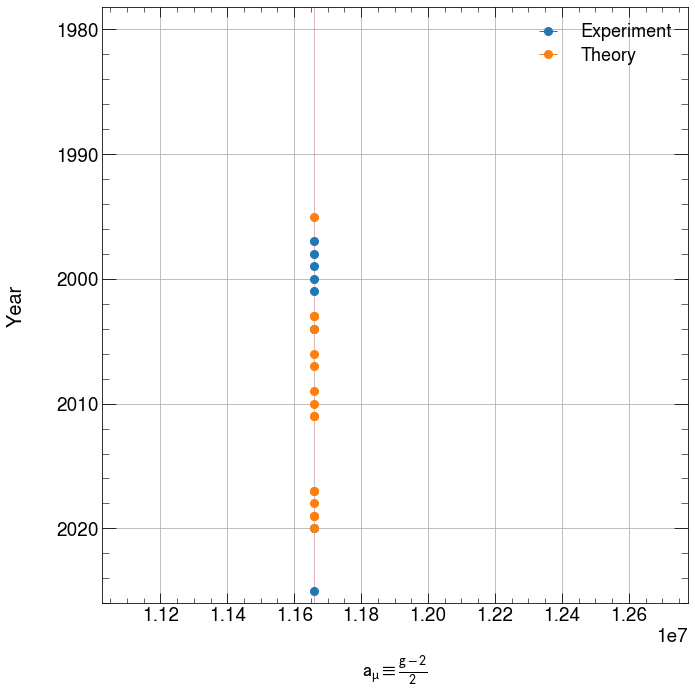

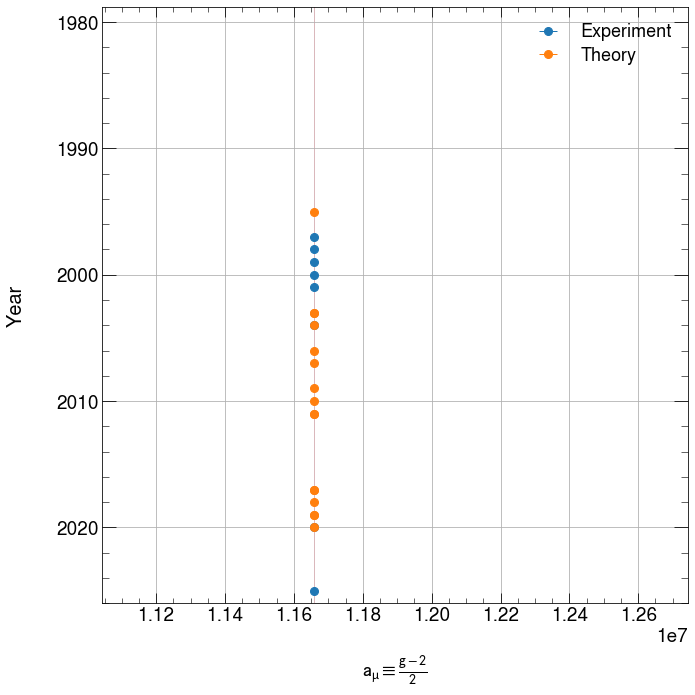

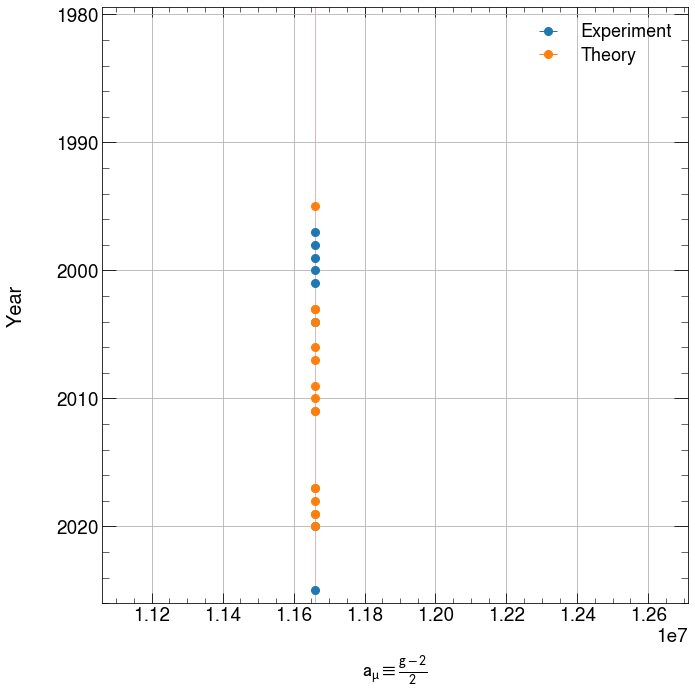

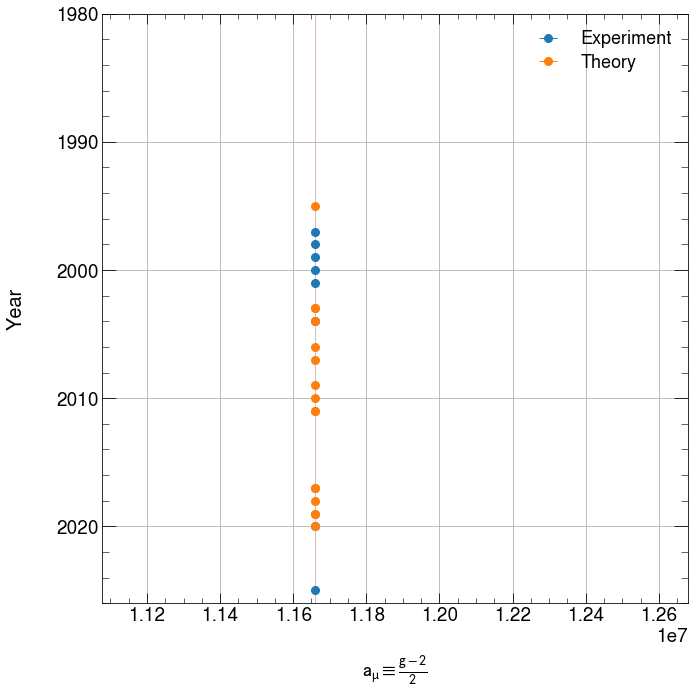

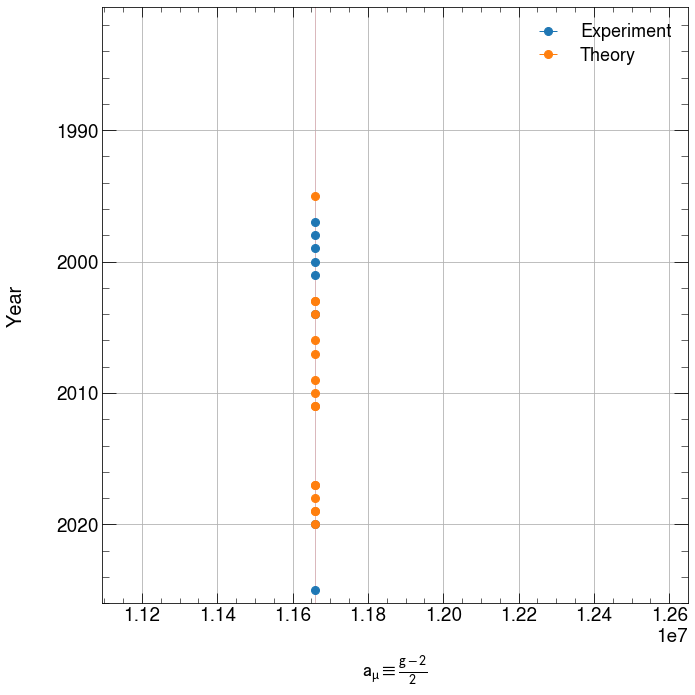

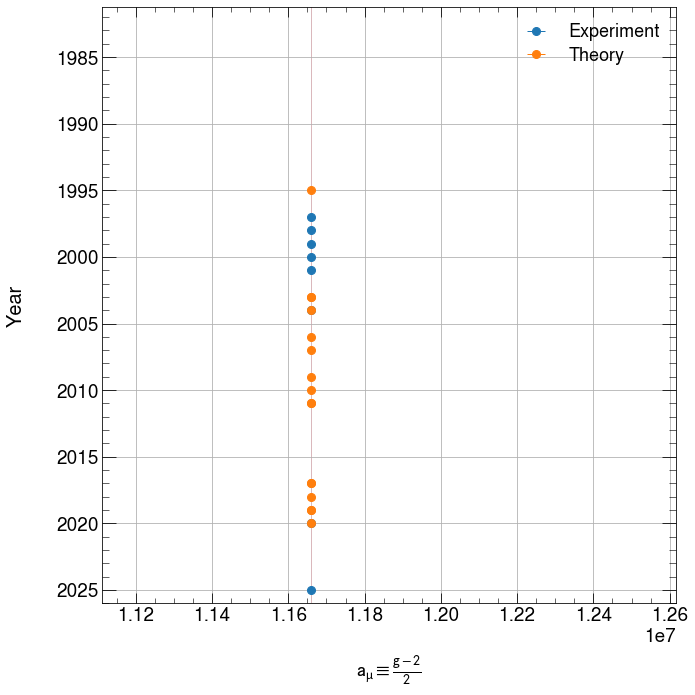

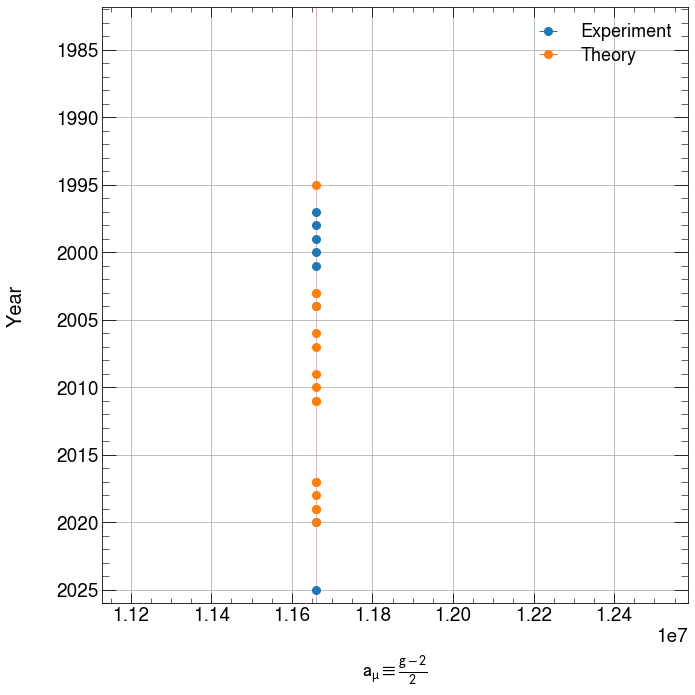

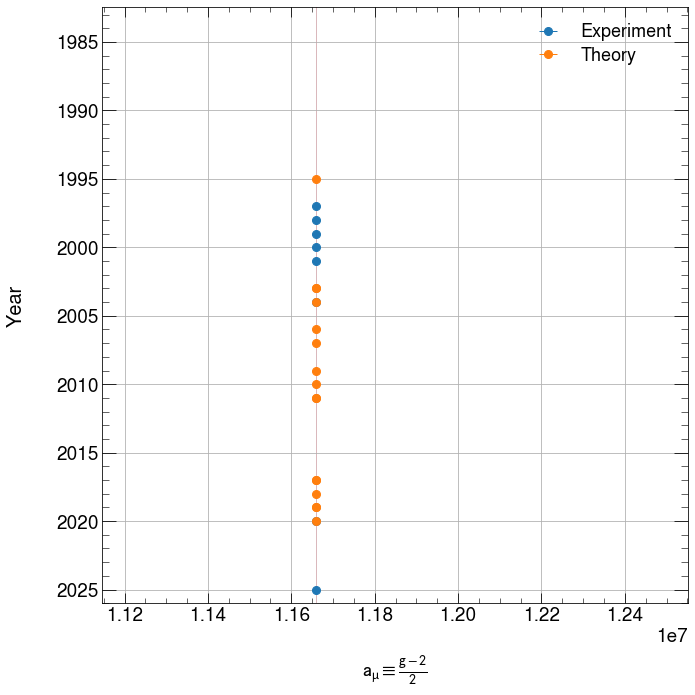

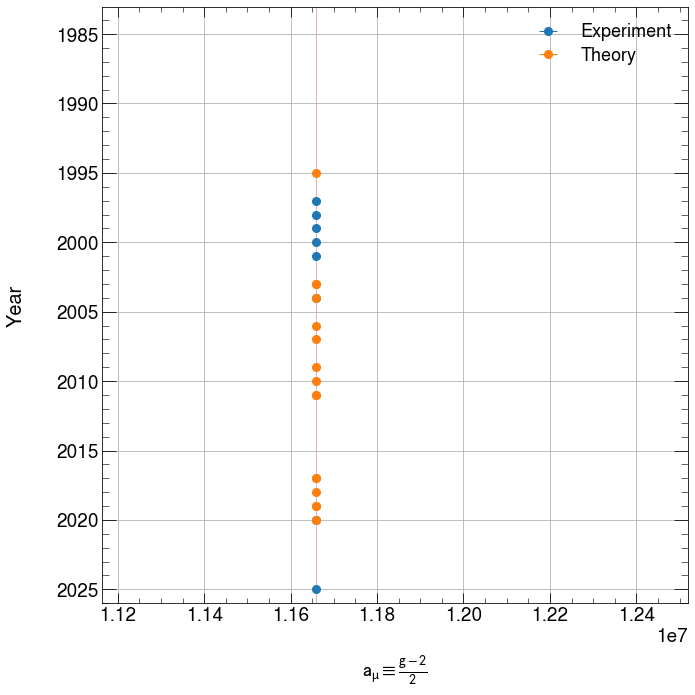

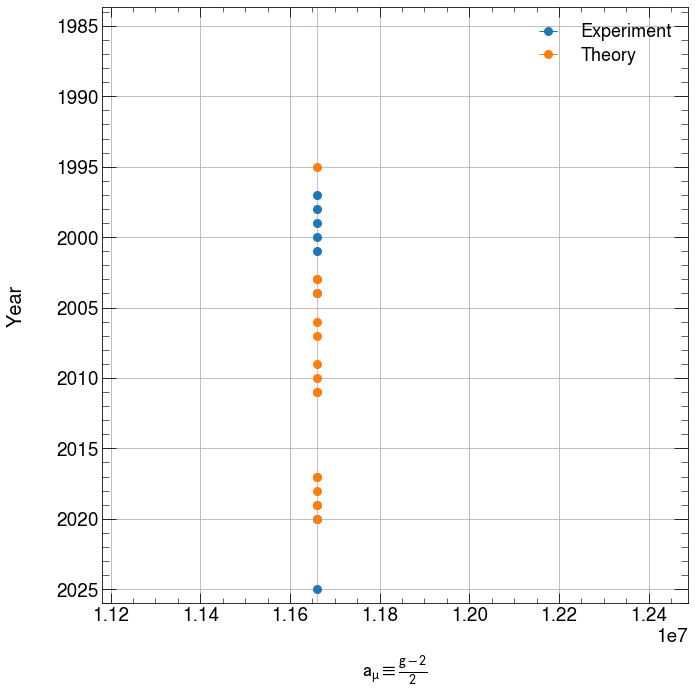

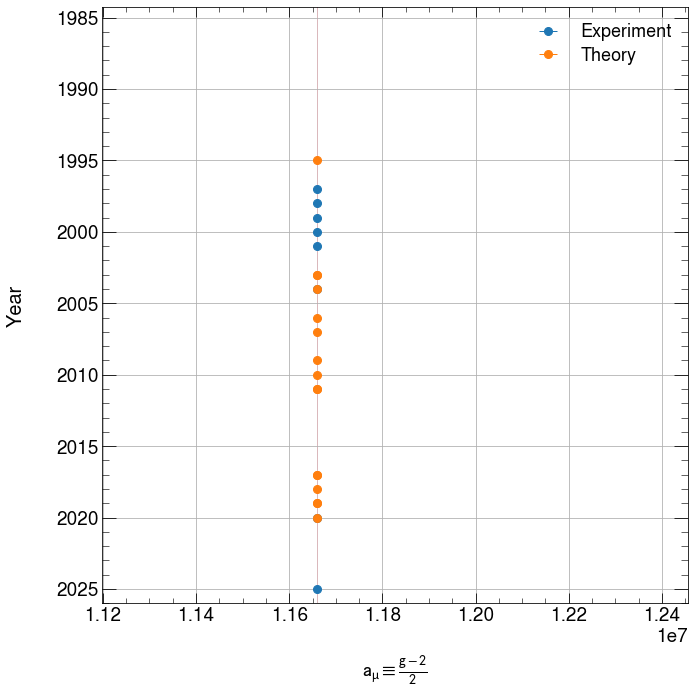

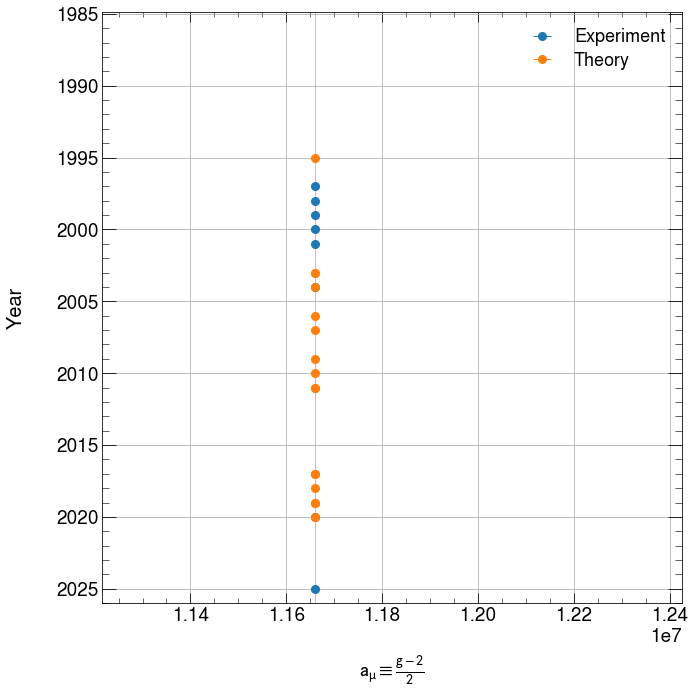

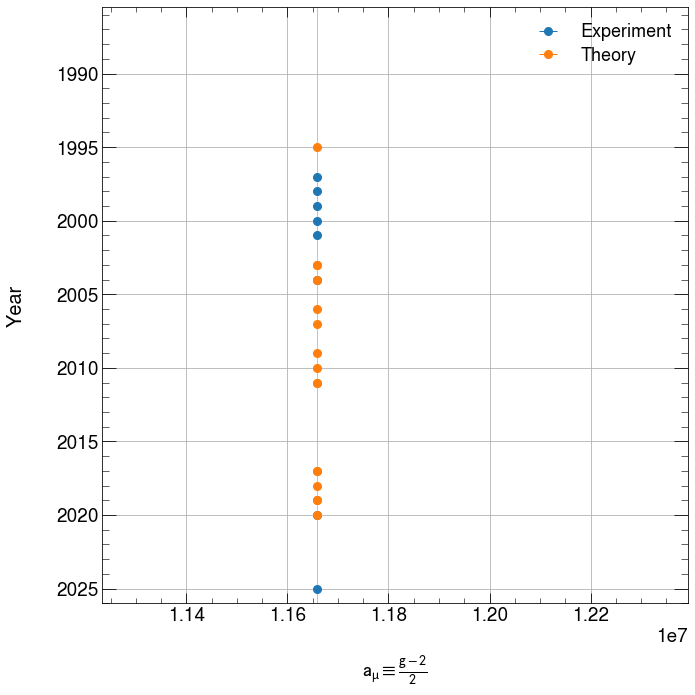

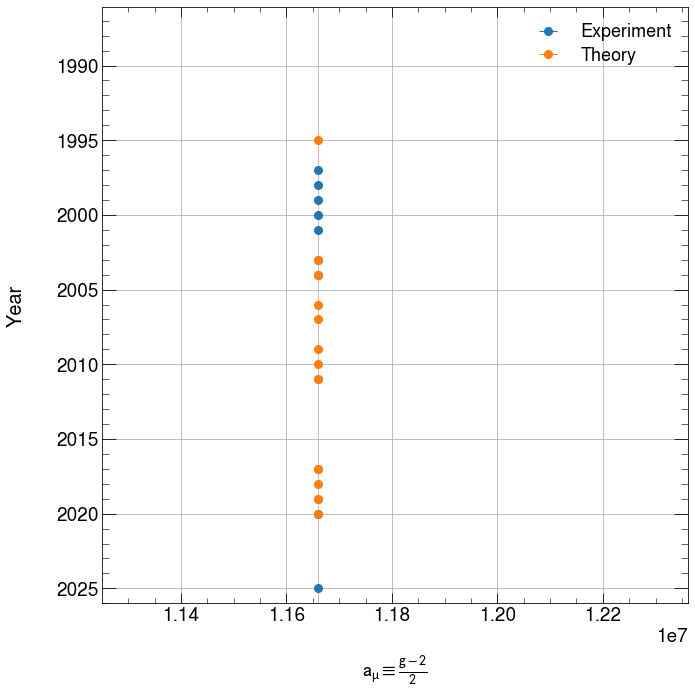

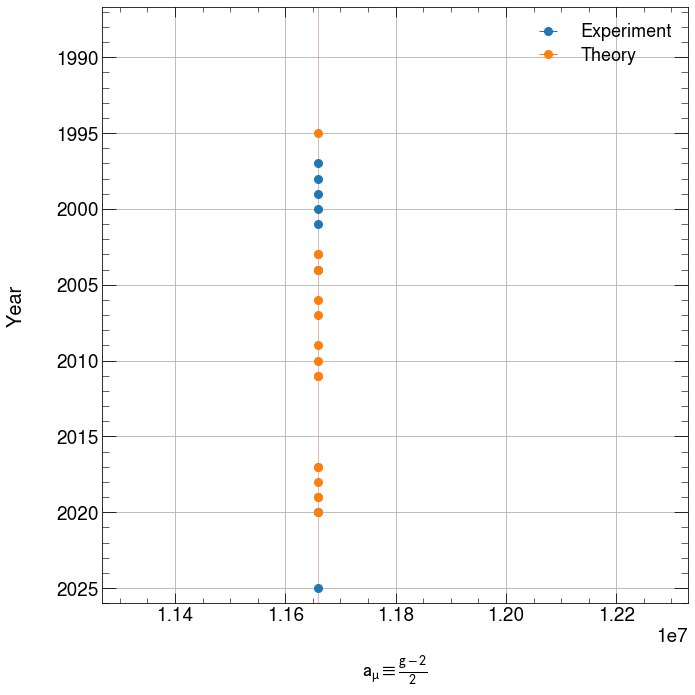

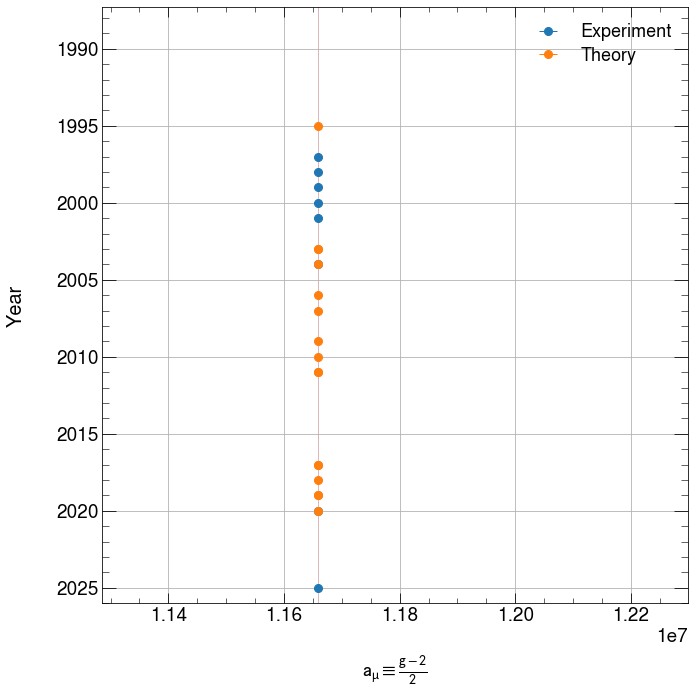

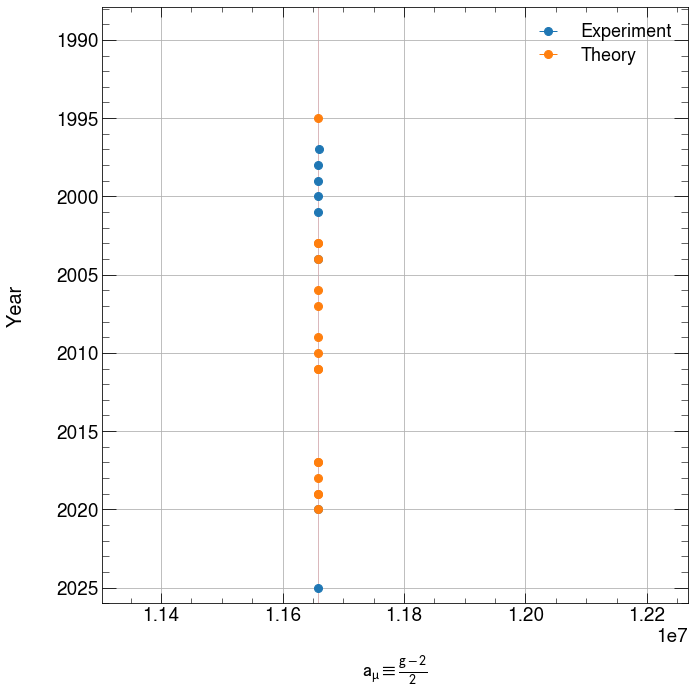

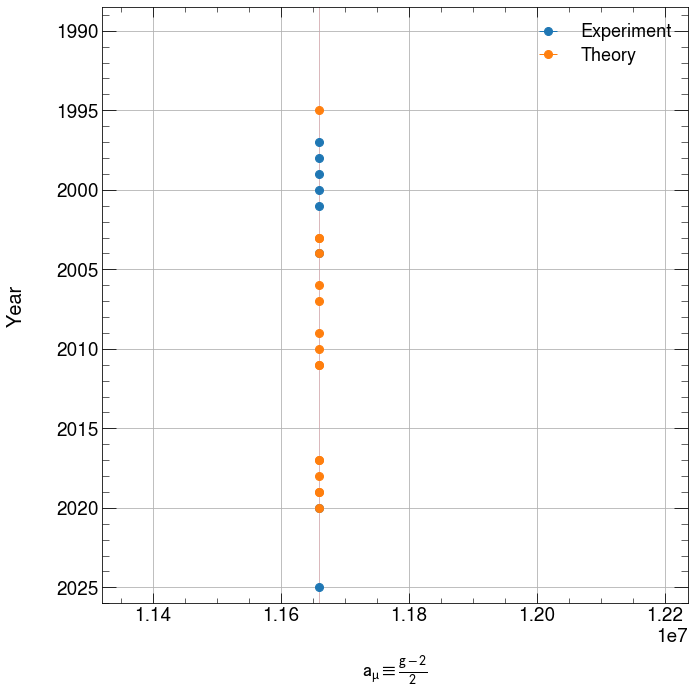

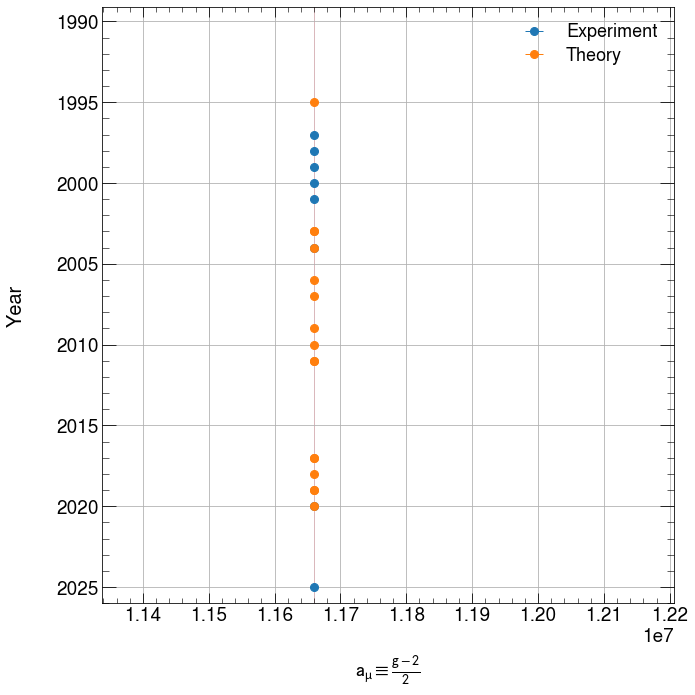

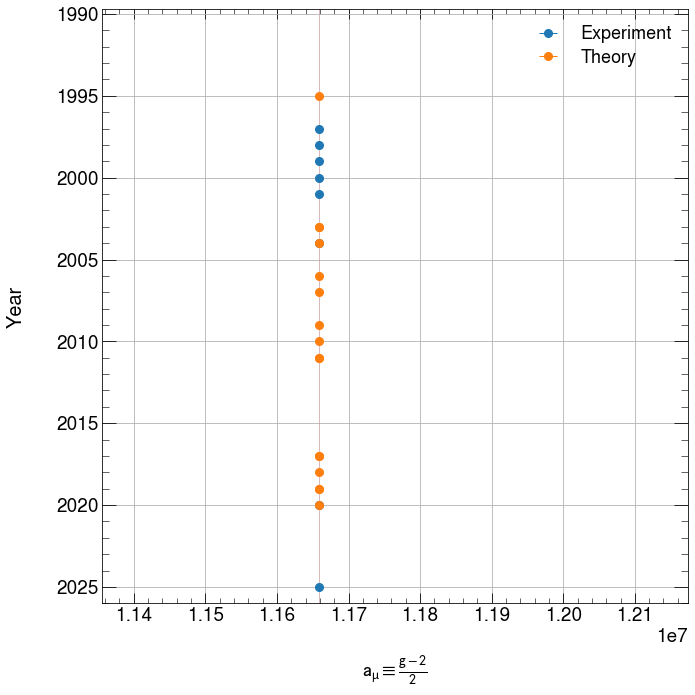

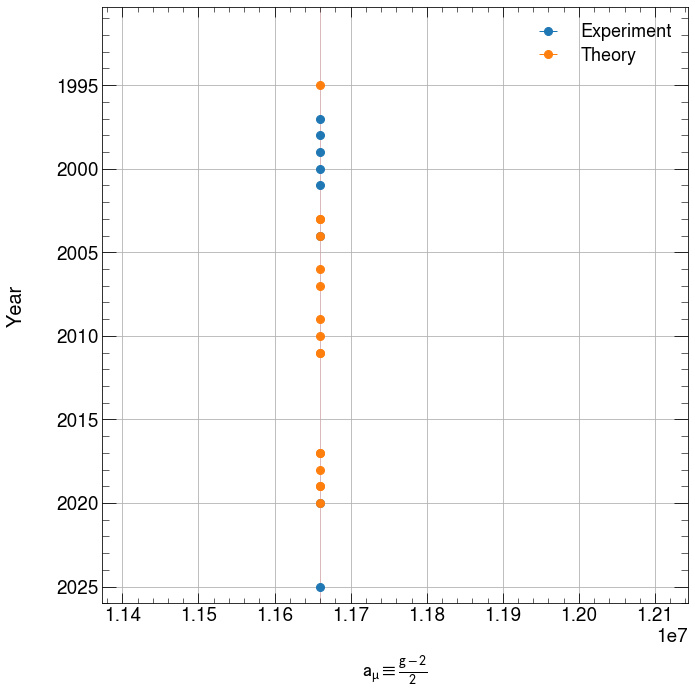

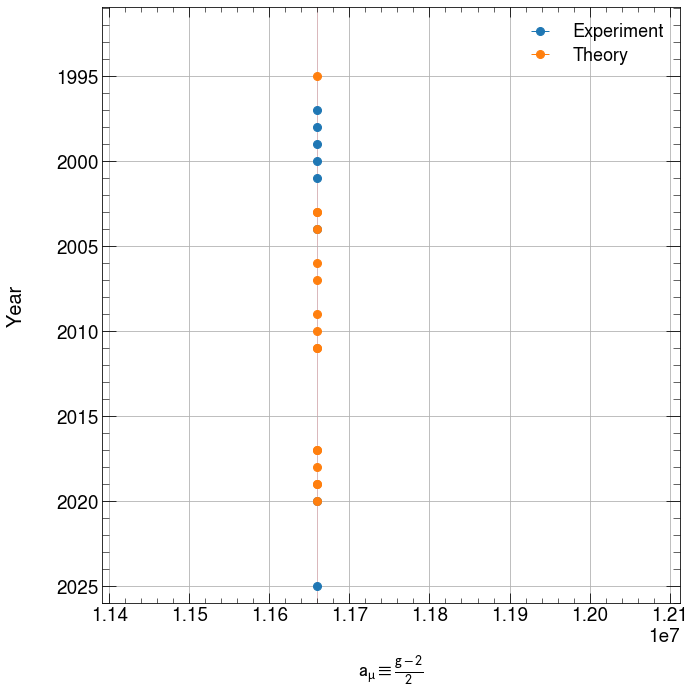

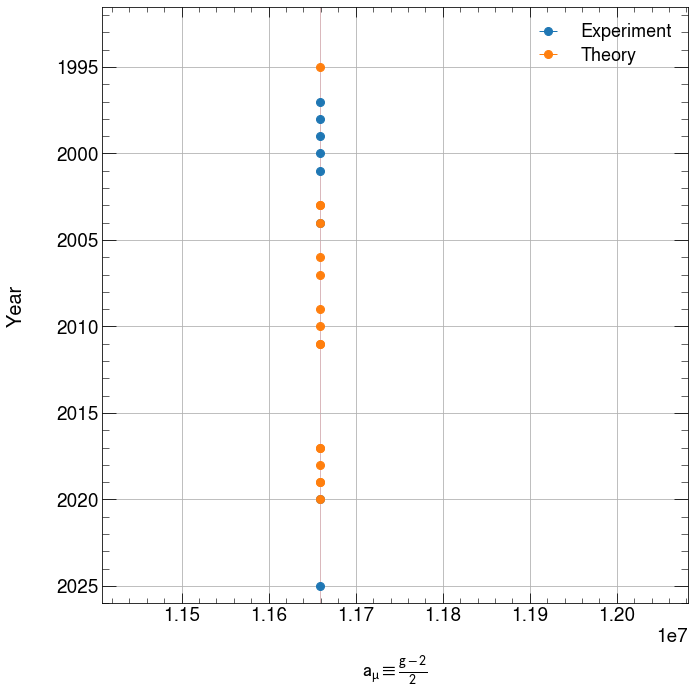

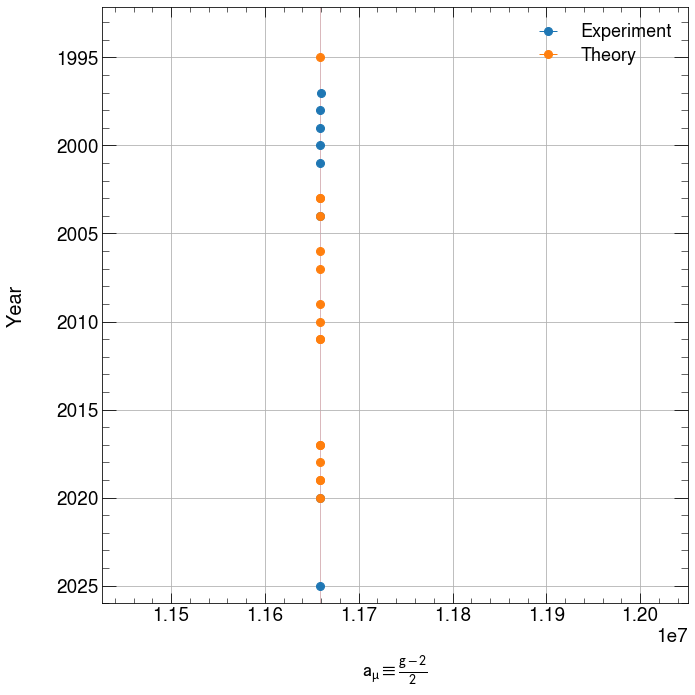

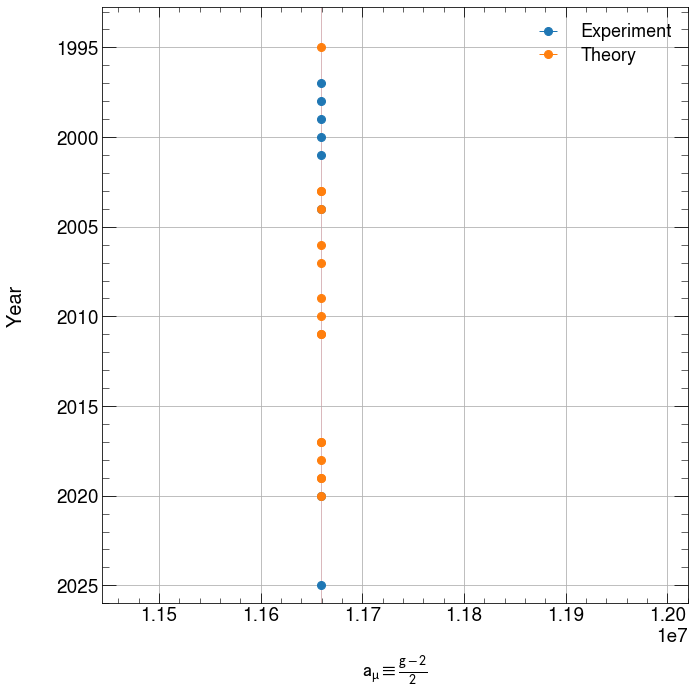

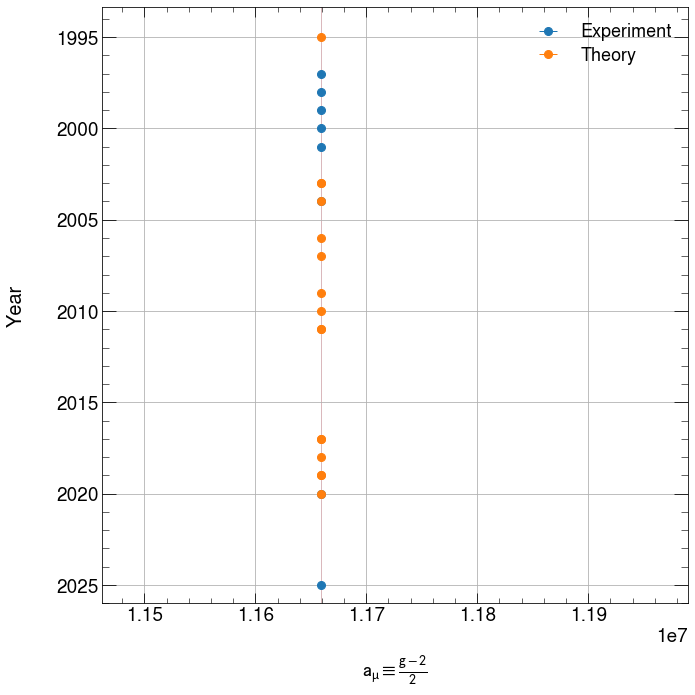

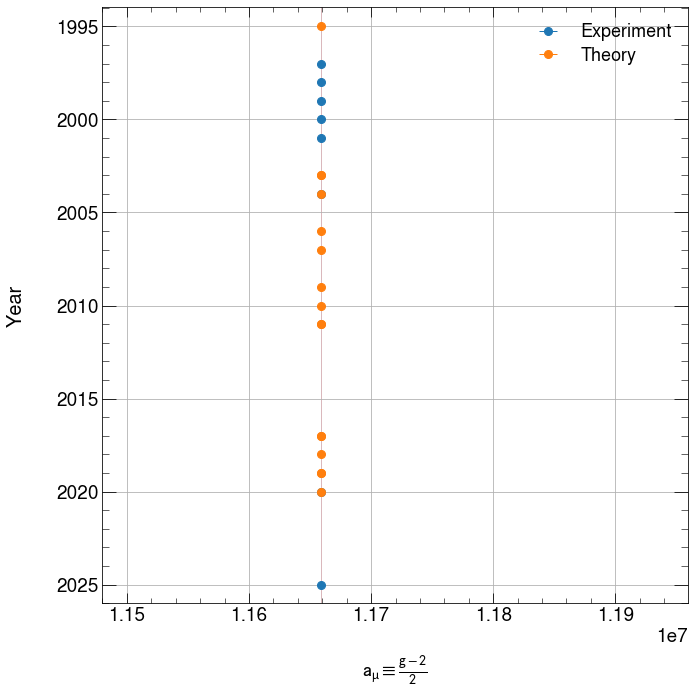

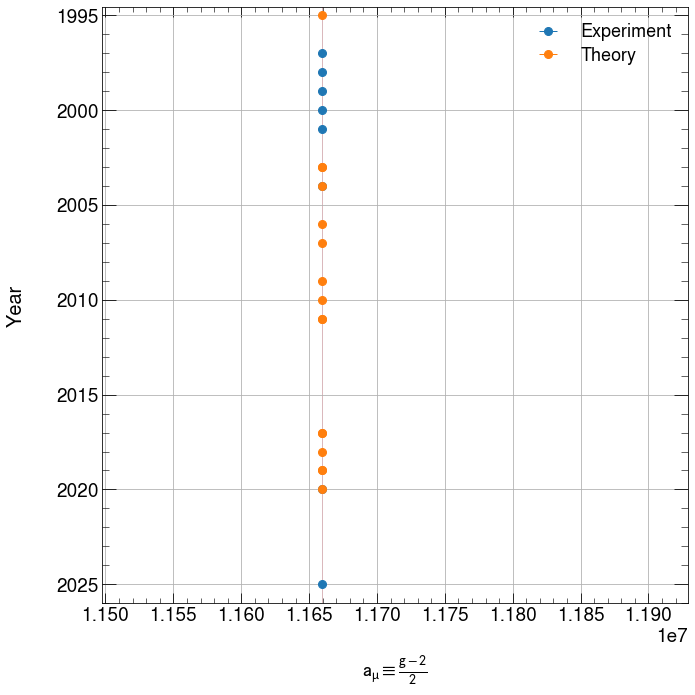

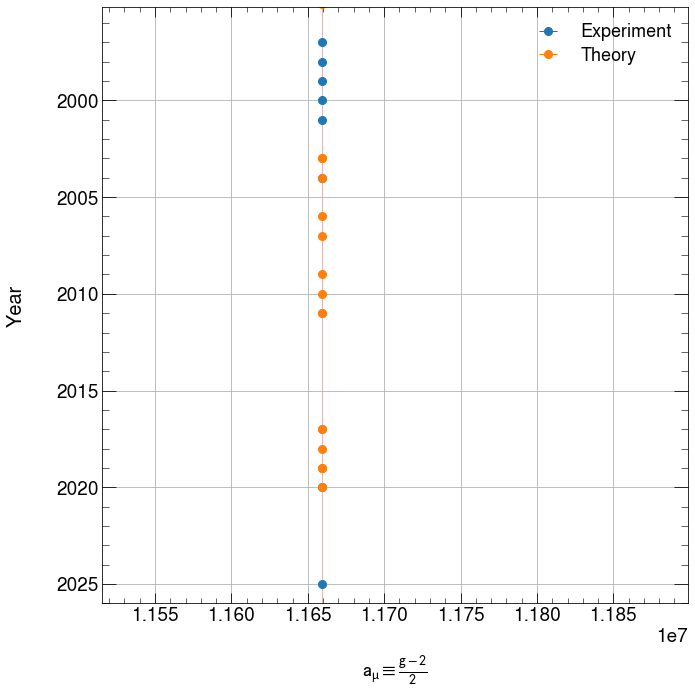

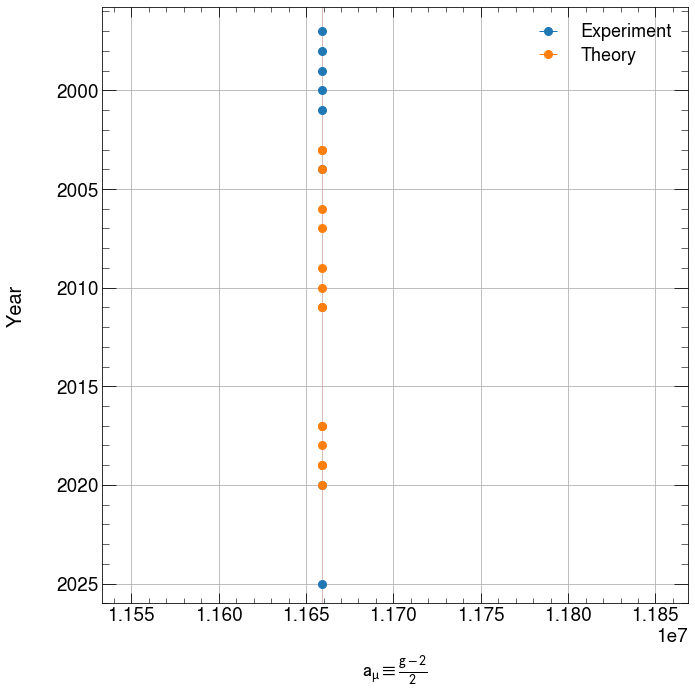

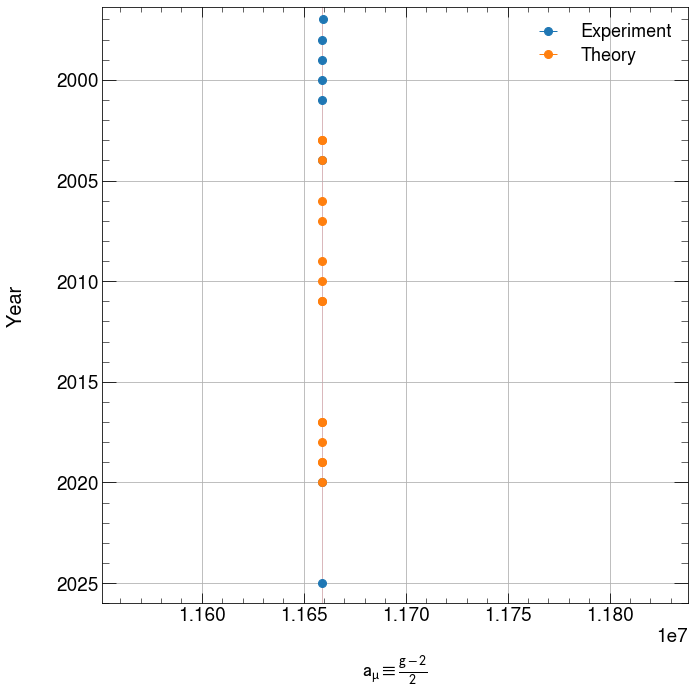

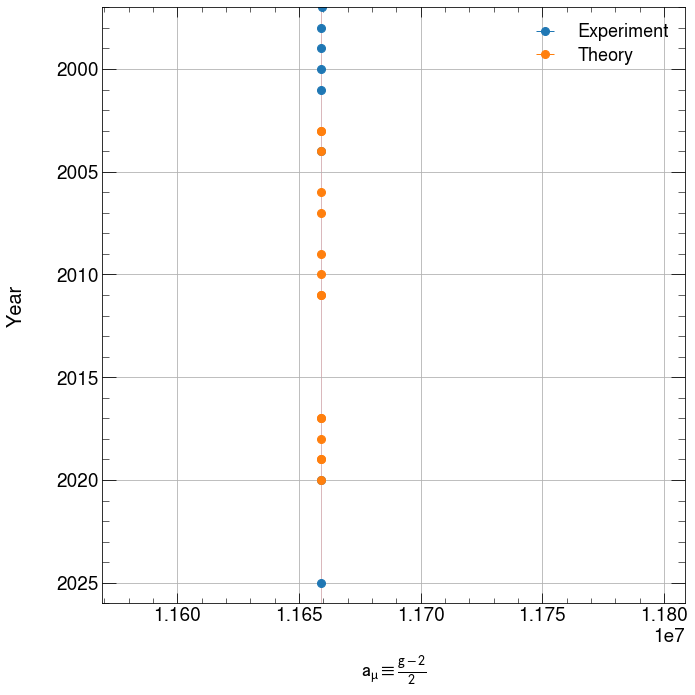

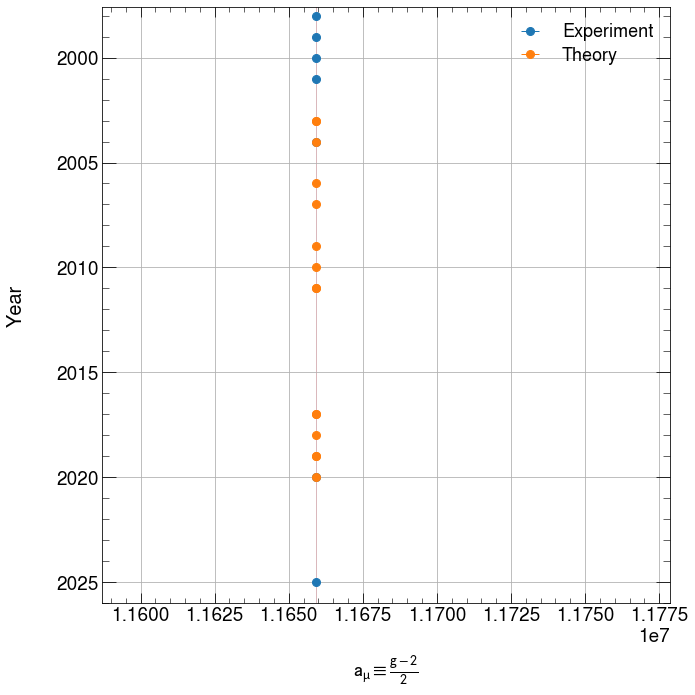

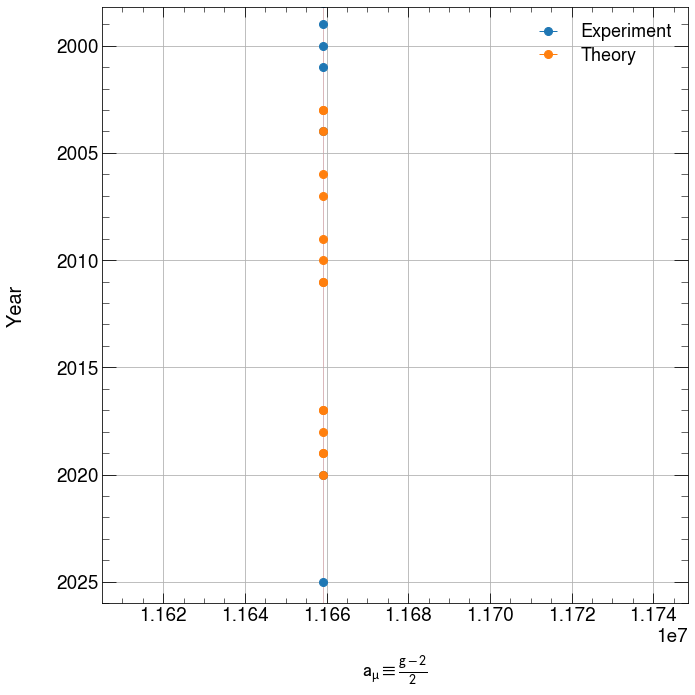

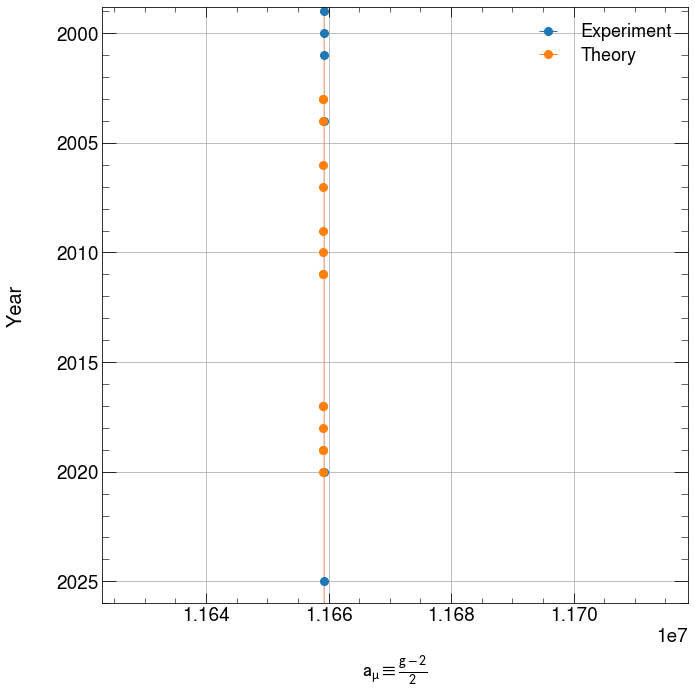

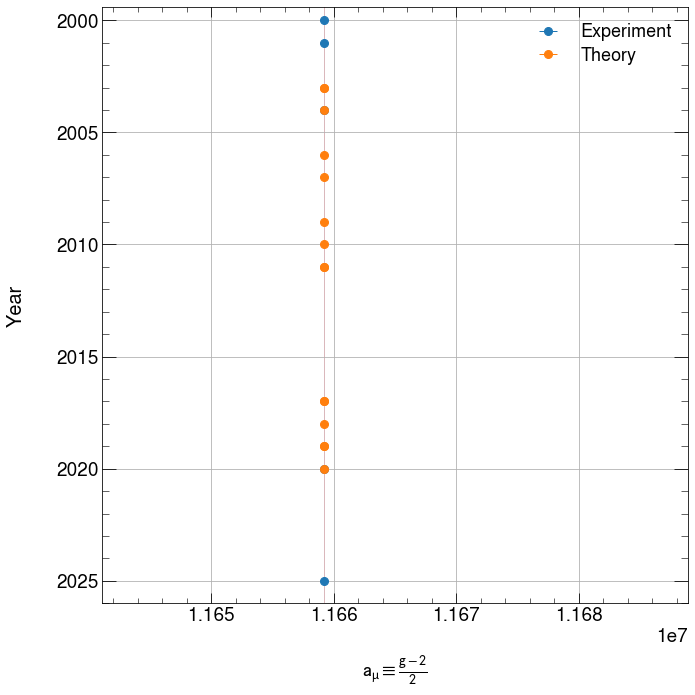

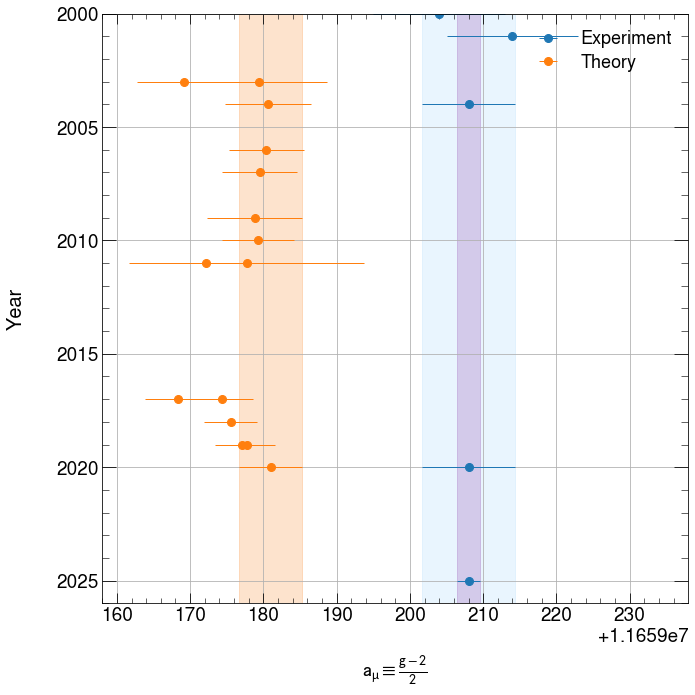

In [22]:
nameloc = float(values[startingpos:startingpos+1][0])

nsteps = 100

yearStartT = 1940
yearEndT = 2000

aStartL = 0.1*10**8
aEndL = 11659208-50

aStartR = 0.15*10**8
aEndR = 11659208+30


topSpace = np.linspace(yearStartT, yearEndT, nsteps)
# leftSpace = np.linspace(aStartL, aEndL, nsteps)
# rightSpace = np.linspace(aStartR, aEndR, nsteps)

leftSpace = np.geomspace(aStartL, aEndL, nsteps)
rightSpace = np.geomspace(aStartR, aEndR, nsteps)




for i in range(len(topSpace)):
    
#     if(i < 295):
#         continue
    
    thisYearT = topSpace[i]
    thisAL = leftSpace[i]
    thisAR = rightSpace[i]

    fig,ax = plt.subplots(figsize=(10,10))

    # experiment 
    startingpos = 0
    plt.errorbar(values[startingpos:], years[startingpos:], xerr=errors[startingpos:], fmt="o", label="Experiment")
#     for year, name, value, error, *_ in experiment[startingpos:]:
#         if(year > thisYearT):
#             plt.text(value+error/10, year-0.125, name)

    #theory
    tstartingpos = 0
    plt.errorbar(tvalues[tstartingpos:], tyears[tstartingpos:], xerr=terrors[tstartingpos:], fmt="o", label='Theory')
#     for year, name, value, error, *_ in theory[tstartingpos:]:
#         if(year > thisYearT):
#             plt.text(value+error/10, year-0.125, name)

    plt.legend(loc=1)

    plt.gca().invert_yaxis()
    plt.grid()

    plt.xlim(thisAL, thisAR)
    plt.ylim(2026,thisYearT)

    plt.ylabel("Year")
    plt.xlabel(r"$a_\mu \equiv \frac{g-2}{2}$")
    
    e821_index = len(experiment) -2
    rect = matplotlib.patches.Rectangle( [experiment[e821_index][2] - experiment[e821_index][3] , 2031], 
                                          experiment[e821_index][3]*2, -1000, color='xkcd:light blue', alpha=0.2 )
    ax.add_patch(rect)
    
    e989_index = len(experiment) - 1
    rect2 = matplotlib.patches.Rectangle( [experiment[e989_index][2] - experiment[e989_index][3] , 2031], 
                                          experiment[e989_index][3]*2, -1000, color='xkcd:purple', alpha=0.2 )
    ax.add_patch(rect2)
    
    theory_index = len(theory)-1
    rect2 = matplotlib.patches.Rectangle( [theory[theory_index][2] - theory[theory_index][3] , 2031], 
                                          theory[theory_index][3]*2, -1000, color='xkcd:orange', alpha=0.2 )
    ax.add_patch(rect2)

    plt.tight_layout()
    plt.savefig("./images/AnimatedHistory_"+str(i).zfill(4)+".png")
    plt.show()
    
#     if(i > 4):
#         break

In [23]:
for i2 in range(i+1,200):
    os.system("cp ./images/AnimatedHistory_"+str(i).zfill(4)+".png ./images/AnimatedHistory_"+str(i2).zfill(4)+".png")
os.system("convert -delay 0 -loop 0 ./images/AnimatedHistory*png ./images/AnimatedHistory.gif")

0